# Análisis de Datos de Accidentes Aéreos

En este notebook, realizaremos un análisis exploratorio de datos (EDA) de un conjunto de datos relacionados con accidentes aéreos. El objetivo es comprender mejor la información contenida en el conjunto de datos y extraer insights significativos que puedan ser útiles para la Organización de Aviación Civil Internacional (OACI) en sus esfuerzos de investigación.

## Importación de Librerías

Comenzaremos por importar las bibliotecas que serán necesarias para llevar a cabo nuestro análisis. En este proyecto, utilizaremos principalmente la biblioteca pandas para la manipulación y exploración de datos.


In [460]:
import pandas as pd 
import numpy as np
import geonamescache
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # "none" para desactivar todos los warnings




## Importamos el csv y comenzamos con el EDA.

In [174]:
df_accident = pd.read_csv('AccidentesAviones.csv', sep= ',')

## Análisis Descriptivo de Datos

En esta sección, realizaremos un análisis descriptivo de nuestros datos utilizando algunos métodos proporcionados por la biblioteca pandas. El análisis descriptivo nos ayudará a obtener una visión general de las características y estadísticas básicas de nuestro conjunto de datos.


In [175]:
df_accident.head(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [176]:
df_accident.tail(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


## Listado de Etiquetas de Columnas

Comenzamos enumerando las etiquetas de las columnas de nuestro DataFrame para comprender qué información contienen. Esto nos proporciona una visión general de las variables disponibles en nuestros datos.


In [177]:
df_accident.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Eliminamos la columna 'Unnamed: 0' de nuestro conjunto de datos. La razón principal para esta eliminación es que esta columna no aporta información adicional y es coincidente con el índice del DataFrame.

In [178]:
df_accident.drop(columns=['Unnamed: 0', 'cn_ln'], inplace=True)


# Descripción de las Columnas

A continuación, proporcionamos una descripción detallada de cada una de las columnas en nuestro conjunto de datos. Esto nos ayudará a comprender mejor la información que contienen y su relevancia en nuestro análisis.

- **fecha**: La fecha en que ocurrió el accidente.
- **HORA declarada**: La hora declarada del accidente, en formato de 24 horas (hh:mm).
- **Ruta**: La ubicación o ruta donde ocurrió el accidente.
- **OperadOR**: El operador de la aeronave involucrada en el accidente.
- **flight_no**: El número de vuelo asignado por el operador de la aeronave.
- **route**: La ruta completa o parcial volada antes del accidente.
- **ac_type**: El tipo de aeronave involucrada en el accidente.
- **registration**: El registro o matrícula de la aeronave de acuerdo con la normativa de la OACI (Organización de Aviación Civil Internacional).
- **cn_ln**: El número de construcción o serie / Número de línea o número de fuselaje de la aeronave.
- **all_aboard**: El número total de personas a bordo durante el accidente.
- **PASAJEROS A BORDO**: El número de pasajeros a bordo durante el accidente.
- **crew_aboard**: El número de miembros de la tripulación a bordo durante el accidente.
- **cantidad de fallecidos**: La cantidad total de personas fallecidas como resultado del accidente.
- **passenger_fatalities**: La cantidad de pasajeros fallecidos en el accidente.
- **crew_fatalities**: La cantidad de miembros de la tripulación fallecidos en el accidente.
- **ground**: Indica la cantidad de muertes de civiles en tierra como resultado del accidente.
- **summary**: Un resumen o descripción breve del accidente, que incluye información sobre la causa si se conoce.

### Renombramos las columnas para facilitar la manipulación.


In [179]:
new_column_names = {
    'fecha': 'date',
    'HORA declarada': 'declared_time',
    'Ruta': 'location',
    'OperadOR': 'operator',
    'flight_no': 'flight_number',
    'route': 'flight_route',
    'ac_type': 'aircraft_type',
    'registration': 'aircraft_registration',
    'cn_ln': 'serial_number',
    'all_aboard': 'total_on_board',
    'PASAJEROS A BORDO': 'passengers_on_board',
    'crew_aboard': 'crew_on_board',
    'cantidad de fallecidos': 'total_fatalities',
    'passenger_fatalities': 'passenger_fatalities',
    'crew_fatalities': 'crew_fatalities',
    'ground': 'ground_fatalities',
    'summary': 'summary'
}

# Rename the columns using the mapping dictionary
df_accident.rename(columns=new_column_names, inplace=True)



## Resumen de la Información del Conjunto de Datos


In [180]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5008 non-null   object
 1   declared_time          5008 non-null   object
 2   location               5008 non-null   object
 3   operator               5008 non-null   object
 4   flight_number          5008 non-null   object
 5   flight_route           5007 non-null   object
 6   aircraft_type          5008 non-null   object
 7   aircraft_registration  5008 non-null   object
 8   total_on_board         5008 non-null   object
 9   passengers_on_board    5008 non-null   object
 10  crew_on_board          5008 non-null   object
 11  total_fatalities       5008 non-null   object
 12  passenger_fatalities   5008 non-null   object
 13  crew_fatalities        5008 non-null   object
 14  ground_fatalities      5008 non-null   object
 15  summary              

Nuestro conjunto de datos consta de 5008 filas y 18 columnas.

## Búsqueda de valores faltantes
### Utilizamos la función `isnull()` para identificar valores faltantes


In [181]:
valores_faltantes = df_accident.isnull().sum()
valores_faltantes


date                     0
declared_time            0
location                 0
operator                 0
flight_number            0
flight_route             1
aircraft_type            0
aircraft_registration    0
total_on_board           0
passengers_on_board      0
crew_on_board            0
total_fatalities         0
passenger_fatalities     0
crew_fatalities          0
ground_fatalities        0
summary                  0
dtype: int64

### Calculamos el porcentaje de valores faltantes


In [182]:
porcentaje_faltantes = (valores_faltantes / len(df_accident)) * 100
porcentaje_faltantes


date                     0.000000
declared_time            0.000000
location                 0.000000
operator                 0.000000
flight_number            0.000000
flight_route             0.019968
aircraft_type            0.000000
aircraft_registration    0.000000
total_on_board           0.000000
passengers_on_board      0.000000
crew_on_board            0.000000
total_fatalities         0.000000
passenger_fatalities     0.000000
crew_fatalities          0.000000
ground_fatalities        0.000000
summary                  0.000000
dtype: float64

### Detección de registros duplicados
#### Utilizamos la función `duplicated()` para identificar registros duplicados

In [183]:
df_accident.duplicated().sum()

0

Encontramos duplicados en la columna 'summary' que procedemos a borrar, quedándonos con el primer registro. 

In [184]:
df_accident['summary'].duplicated().sum()

150

In [185]:
df_accident = df_accident.drop_duplicates(subset='summary', keep='first')

Podemos ver que casi no hay nulos y lejos de alegrarnos y festejar notamos que se debe a que hay valores '?' en lugar de valores correctos.

In [186]:
# Verifica si cada valor es nulo o contiene "?", y suma los valores True (1) para obtener el recuento
signos = (df_accident == '?').sum()

# Muestra el recuento de valores nulos en cada columna
print(signos)


date                        0
declared_time            1369
location                    4
operator                    9
flight_number            3532
flight_route              668
aircraft_type              10
aircraft_registration     237
total_on_board              9
passengers_on_board       173
crew_on_board             171
total_fatalities            4
passenger_fatalities      185
crew_fatalities           185
ground_fatalities          36
summary                     1
dtype: int64


Eliminamos flight_number debido a que está mayoritariamente compuesto por signos de pregunta. 

In [187]:
df_accident.drop(columns=['flight_number'], inplace=True)


En este paso del análisis de datos, se realiza una limpieza de los valores que contienen el signo de pregunta "?" en el DataFrame df_accident. Los signos de pregunta pueden representar datos faltantes o valores desconocidos en el conjunto de datos. Para asegurar que los datos sean coherentes y tratables de manera uniforme, se opta por reemplazar todos los signos de pregunta por valores vacíos (cadenas vacías).

Este proceso de limpieza es importante para que el conjunto de datos esté listo para futuros análisis y visualizaciones.

In [188]:
df_accident.replace('?', '', inplace=True)



## Conversión de Tipos de Datos. 


In [189]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4858 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   4858 non-null   object
 1   declared_time          4858 non-null   object
 2   location               4858 non-null   object
 3   operator               4858 non-null   object
 4   flight_route           4857 non-null   object
 5   aircraft_type          4858 non-null   object
 6   aircraft_registration  4858 non-null   object
 7   total_on_board         4858 non-null   object
 8   passengers_on_board    4858 non-null   object
 9   crew_on_board          4858 non-null   object
 10  total_fatalities       4858 non-null   object
 11  passenger_fatalities   4858 non-null   object
 12  crew_fatalities        4858 non-null   object
 13  ground_fatalities      4858 non-null   object
 14  summary                4858 non-null   object
dtypes: object(15)
memory usage

### DATE.

Empezamos con date y usamos unique() para explorar y comprender los valores únicos de la columna. 

Esto es útil para:
- Identificar patrones en los datos.
- Verificar la calidad de los datos.
- Planificar transformaciones.

In [190]:
df_accident.date.unique()

array(['September 17, 1908', 'September 07, 1909', 'July 12, 1912', ...,
       'June 10, 2021', 'July 04, 2021', 'July 06, 2021'], dtype=object)

Utilizamos to_datetime para pasar date al formato correspondiente. 

In [191]:
df_accident['date'] = pd.to_datetime(df_accident['date'], errors='coerce')  # Convertir a tipo datetime


Controlamos que todo esté en orden.

In [192]:
df_accident.date

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 4858, dtype: datetime64[ns]

### Declared Time.

In [193]:
df_accident['declared_time'].unique()

array(['1718', '', '0630', ..., '0729', '0722', '1914'], dtype=object)

Utilizamos la función str.replace con una expresión regular para buscar patrones de dos dígitos seguidos y reemplazarlos por el mismo patrón pero con dos puntos en el medio. Esto asegura que todas las horas estén en un formato 'HH:MM'.

In [194]:
df_accident['declared_time'] = df_accident['declared_time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

Chequeamos que todo esté en orden.

In [195]:
df_accident.isna().sum()

date                     0
declared_time            0
location                 0
operator                 0
flight_route             1
aircraft_type            0
aircraft_registration    0
total_on_board           0
passengers_on_board      0
crew_on_board            0
total_fatalities         0
passenger_fatalities     0
crew_fatalities          0
ground_fatalities        0
summary                  0
dtype: int64

Recorremos valores únicos y notamos que hay datos con errores (ej: 'c 11:30'), por lo que extraemos las horas en formato 'HH:MM' aplicando la función str.extract con una expresión regular para extraer solo las horas en formato 'HH:MM' de los valores. Esto elimina cualquier carácter no deseado o datos mal formateados y conserva solo las horas y minutos válidos.

Finalmente, utilizamos fillna para rellenar los valores NaN (que podrían haber quedado después de la extracción) con una cadena vacía (''). Esto asegura que todos los valores en la columna 'declared_time' sean coherentes y no contengan valores nulos.



In [196]:
valores_unicos = df_accident['declared_time'].unique()

In [197]:
# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17:18

06:30
18:30
10:30
01:00
15:20
23:45
05:15
08:45
07:45
21:30
10:00
16:55
12:15
17:40
11:40
13:15
16:45
13:42
17:30
c 18:00
c 02:30
c 12:00
05:30
09:30
15:27
c 13:15
08:00
08:30
04:05
14:48
c 11:00
c 9:15
11:30
c 10:00
10:45
17:00
09:18
11:45
21:00
11:01
18:00
07:00
10:10
09:35
c 17:00
18:23
c:17:00
15:00
c 15:45
02:05
09:45
c: 2:00
22:40
13:00
23:30
22:30
09:00
08:40
20:00
04:00
06:48
05:45
c 16:00
02:00
19:30
12:00
c 08:00
00:10
c:09:00
06:00
02:07
20:07
14:30
12:30
07:40
03:15
15:40
22:35
16:00
c 13:00
18:15
14:15
05:00
11:00
09:50
22:45
10:50
23:42
07:30
03:33
02:52
19:00
00:45
15:18
03:30
18:35
22:25
14:36
09:40
14:20
20:18
20:08
23:00
09:55
02:19
19:40
04:40
19:15
19:32
03:52
19:10
10:20
05:20
22:00
03:00
14:00
03:38
10:47
03:14
03:23
20:47
19:38
11:07
20:50
13:40
18:40
19:25
10:40
12:25
04:23
16:50
15:30
15:07
08:03
c 20:40
04:45
14:07
22:17
02:56
04:11
c 23:00
13:45
18:41
00:51
07:55
c 09:00
11:20
16:30
21:15
07:59
13:17
09:25
16:20
18:50
16:35
14:10
08:15
13:20
10:15
14:4

In [198]:
# Elimina los valores no válidos o que no estén en formato 'HH:MM'
df_accident['declared_time'] = df_accident['declared_time'].str.extract(r'(\d{2}:\d{2})', expand=False)

# Rellena los valores NaN con una cadena vacía ('')
df_accident['declared_time'] = df_accident['declared_time'].fillna('')

## Location.

Al explorar la columna 'location' a través de la nube de palabras y otros métodos explicitados debajo, hemos observado que algunos registros contienen información más detallada, como ciudades o estados, en lugar de solo países. Para estandarizar y obtener una lista de países a partir de esta columna, hemos implementado un proceso de extracción y limpieza.

Exploramos la columna 'location'.

In [199]:
rutas = df_accident['location'].unique()
rutas

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [200]:
for ruta in rutas:
    print(ruta)

Fort Myer, Virginia
Juvisy-sur-Orge, France
Atlantic City, New Jersey
Victoria, British Columbia, Canada
Over the North Sea
Near Johannisthal, Germany
Tienen, Belgium
Off Cuxhaven, Germany
Near Jambol, Bulgeria
Billericay, England
Potters Bar, England
Mainz, Germany
Off West Hartlepool, England
Near Gent, Belgium
Off Northern Germany
Near Texel Island, North Sea
Off Vlieland Island, North Sea
Near Yarmouth, England
Near Luneville, France
Over the Mediterranean
Off Helgoland Island, Germany
Ameland Island, North Sea
Elizabeth, New Jersey
Cleveland, Ohio
Dix Run, Pennsylvania
Chicago, Illinois
Verona, Italy
Newcastle, England
Cantonsville, Maryland
English Channel off Forkstone, Kent
Long Valley, New Jersey
Catherham, Surrey, UK
New Paris, Indiana
Newark, New Jersey
Heller Field, New Jersey
Oskaloosa, Iowa
Cartagena, Columbia
Bedford, England
College Park, Maryland
Morristown, New Jersey
Pemberville, Ohio
Hillersburg, Pennsylvania
Off Port Vendres, France
Valencia, Spain
Batavia, Illinoi

In [201]:
df_accident.location.nunique()

4011

### Nube de Palabras.

Para visualizar de manera efectiva la distribución de locaciones creamos una nube de palabras a partir de la columna 'location'.

1. **Resumen Visual**: La nube de palabras es una herramienta visual que nos permite obtener un resumen rápido de los países más frecuentes en nuestros datos. Los países que aparecen con mayor frecuencia se mostrarán con un tamaño de fuente más grande en la nube de palabras, lo que facilita la identificación de tendencias y patrones.

2. **Validación de Datos**: La nube de palabras también puede ayudarnos a identificar errores o anomalías en nuestros datos. Por ejemplo, si encontramos nombres de países inusuales o no esperados, podríamos investigar esos registros en particular.

3. **Complemento a Análisis Futuros**: La nube de palabras es una herramienta útil para el análisis exploratorio de datos y puede servir como punto de partida para análisis más profundos. Los países mencionados con mayor frecuencia pueden ser el foco de futuras investigaciones.

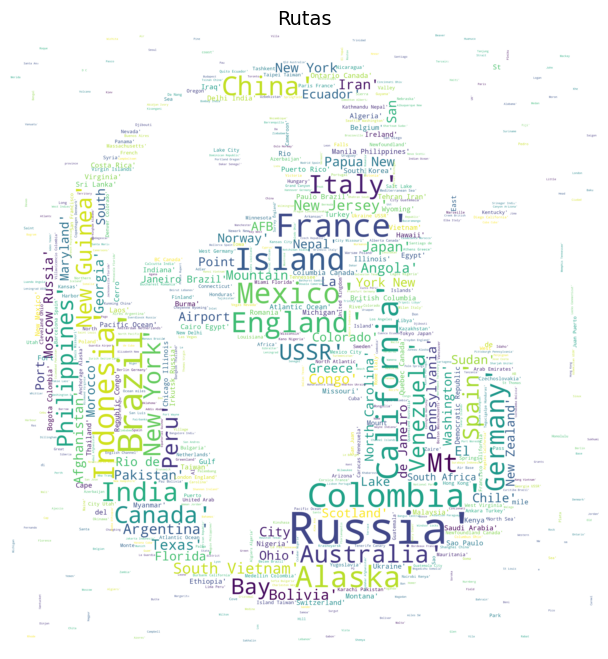

In [202]:
text = str(df_accident.location.tolist())
globe_mask = np.array(Image.open('world.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=1000, mask=globe_mask,
               stopwords=stopwords, contour_color='white',
    contour_width=2, scale=5)
wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Rutas', loc='Center', fontsize=14)
plt.show()

**Creamos una lista de todos los países para comparar y definimos la Función de Extracción**.

1. Se define una función llamada `extract_country_from_location` que toma una ubicación (`location`) como entrada y busca coincidencias de nombres de países en una lista llamada 'paises' utilizando expresiones regulares. Si encuentra una coincidencia, devuelve el nombre del país encontrado; de lo contrario, establece "other" como valor predeterminado.

2. Luego, se aplica esta función a cada fila de la columna 'location' del DataFrame utilizando el método `.apply()`. El resultado de esta operación se almacena en la nueva columna 'country'. En resumen, la columna 'country' contendrá el nombre del país correspondiente en función de la información de la ubicación en 'location'.

Es importante tener en cuenta que este enfoque asume que las ubicaciones en 'location' contienen nombres de países que pueden encontrarse en la lista 'paises' y utiliza expresiones regulares para buscar coincidencias de palabras completas mientras ignora la distinción entre mayúsculas y minúsculas. 

In [203]:
paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan",
    "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo (Brazzaville)", "Congo (Kinshasa)",
    "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "East Timor", "England", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon",
    "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan",
    "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius",
    "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (Burma)", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "Norway", "Oman", "Pakistan", "Palau", "Palestine",
    "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Togo",
    "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe",
    
]


In [204]:
# Supongamos que tienes una lista llamada 'paises' con nombres de países.

def extract_country_from_location(location):
    for pais in paises:
        if re.search(rf'\b{pais}\b', location, re.I):
            return pais
    return "other"  # Si no se encuentra un país, se puede establecer un valor predeterminado.

# Aplica la función a la columna 'Ruta' para crear la nueva columna 'pais'.
df_accident['country'] = df_accident['location'].apply(extract_country_from_location)


Para abordar la presencia de referencias a estados de los Estados Unidos en la columna 'location', utilizamos una lista llamada states_usa que contiene los nombres de los 50 estados estadounidenses.

Luego, aplicamos la función str.contains() de pandas para buscar en la columna 'location' si alguno de los nombres de estados de states_usa se encuentra presente, sin importar las diferencias de mayúsculas y minúsculas (usando case=False). Cuando encontramos una coincidencia, actualizamos el valor correspondiente en la columna 'country' con 'United States'. Este proceso nos permite etiquetar adecuadamente las ubicaciones que hacen referencia a estados de los Estados Unidos en nuestros datos.

La implementación de este código mejora la precisión de nuestros datos y facilita el análisis posterior al agrupar los incidentes aéreos que ocurrieron en diferentes estados de los Estados Unidos bajo una única categoría: 'United States'.


In [205]:
# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Iterar a través de los estados y marcar las filas correspondientes en 'country'
for state in states_usa:
    df_accident.loc[df_accident['location'].str.split(", ").str[-1].str.contains(state, case=False, na=False), 'country'] = 'United States'


Al analizar la columna 'country', notamos que hemos reducido significativamente la cantidad de valores únicos, pasando de 4125 valores únicos en 'location' a 163 valores únicos en 'country'. Esto indica que hemos agrupado varias ubicaciones más detalladas bajo el nombre de su país correspondiente.

Este proceso de extracción y limpieza es fundamental para garantizar que nuestra columna 'country' contenga información coherente y estandarizada, lo que facilitará las futuras tareas de análisis y visualización de datos.

In [206]:
df_accident['country'].nunique()

162

In [207]:
df_accident['country'].unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Italy', 'Spain', 'Australia', 'China', 'Morocco',
       'United Kingdom', 'Romania', 'Russia', 'Colombia', 'Georgia',
       'Hungary', 'Mauritania', 'Algeria', 'Finland', 'Uruguay', 'Brazil',
       'Netherlands', 'Greece', 'Mexico', 'Cuba', 'Iran', 'Madagascar',
       'Argentina', 'Denmark', 'New Zealand', 'Bulgaria', 'South Africa',
       'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia', 'Ukraine',
       'Peru', 'Syria', 'Pakistan', 'Egypt', 'Honduras', 'Switzerland',
       'Panama', 'Sweden', 'Norway', 'Croatia', 'Tajikistan', 'Libya',
       'Gambia', 'Guinea', 'Sudan', 'Poland', 'Samoa', 'India',
       'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador', 'Malta',
       'Indonesia', 'Oman', 'Estonia', 'Turkmenistan', 'Kazakhstan',
       'Austria', 'Portugal', 'Guyana', 'Ireland', 'Nicaragua',
       'Ivory Coast', 'Philippines', 'Bahamas', 'Nigeria', 'Costa Rica',
       'Sri L

## Asignación de Superficie de Accidente: Identificación de Vuelos en Tierra o Mar

El siguiente fragmento de código aborda la tarea de identificar si un accidente aéreo ocurrió en tierra o en el mar, y se aplica a un DataFrame denominado 'df_accident'. Esta asignación es esencial para comprender mejor la naturaleza de los accidentes aéreos y puede tener implicaciones significativas en el análisis y la toma de decisiones. A continuación, se explican los detalles de este proceso:

### Función 'assign_surface(location)'

Primero, definimos una función llamada 'assign_surface(location)' que toma un único parámetro llamado 'location'. Esta función se encarga de determinar si un accidente ocurrió en tierra o en el mar, basándose en ciertas palabras clave relacionadas con el agua presentes en la ubicación del accidente.

- **Lista de Palabras Clave Relacionadas con el Agua:** Creamos una lista llamada 'water_keywords' que contiene palabras clave relacionadas con el agua, como 'sea', 'ocean', 'river', 'channel' y 'over'. Estas palabras clave son indicadores potenciales de que un accidente puede haber ocurrido en el agua.

- **Comprobación de Palabras Clave:** Utilizamos una expresión generadora junto con 'any()' para verificar si alguna de las palabras clave en 'water_keywords' aparece en la ubicación del accidente. Esta comprobación se realiza en minúsculas ('location.lower()') para evitar problemas de mayúsculas y minúsculas.

- **Resultado de la Función:** Si se encuentra alguna palabra clave relacionada con el agua en la ubicación, la función devuelve 'water', lo que indica que el accidente ocurrió en el agua. De lo contrario, devuelve 'ground', lo que indica que el accidente ocurrió en tierra.

### Creación de la Columna 'surface'

Finalmente, aplicamos la función 'assign_surface' a la columna 'location' del DataFrame 'df_accident' utilizando 'apply()'. Esto crea una nueva columna llamada 'surface' que contiene la designación de si cada accidente ocurrió en tierra o en el mar.

Este proceso es crucial para la segmentación y el análisis posterior de los datos, ya que nos permite diferenciar entre tipos de accidentes según su ubicación en tierra o agua. Además, proporciona una base sólida para investigaciones más detalladas y conclusiones relacionadas con la seguridad de la aviación y la prevención de accidentes.


In [208]:
def assign_surface(location):
    # Lista de palabras clave relacionadas con el agua
    water_keywords = ['sea', 'ocean', 'river', 'over', 'lake', 'channel', 'pond', 'bay', 'gulf', 'strait', 'creek', 'stream', 'canal', 'fjord', 'lagoon', 'reservoir', 'flood', 'overflow', 'swamp', 'marsh', 'aquatic', 'nautical', 'maritime', 'coast', 'beach', 'shore', 'reef', 'underwater', 'submerged', 'subaquatic', 'submarine', 'tidal', 'current', 'fishing', 'sailing', 'boating', 'ship', 'wreck', 'drowning', 'flooding', 'tsunami', 'tsunamis', 'submersion', 'naval', 'flotilla', 'tide', 'whirlpool', 'buoy', 'wharf', 'dock', 'harbor', 'inlet', 'whale', 'seashell']


    # Comprobamos si alguna de las palabras clave aparece en la ubicación
    if any(keyword in location.lower() for keyword in water_keywords):
        return 'water'
    else:
        return 'ground'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
df_accident['surface'] = df_accident['location'].apply(assign_surface)


La siguiente clasificación sobre la ubicación del incidente no es exacta debido a se utiliza un enfoque basado en palabras clave para hacer una suposición educada sobre si un incidente ocurrió en tierra o en agua.

Dicho esto, importante tener en cuenta que esta aproximación puede no ser perfecta y puede haber casos en los que la presencia o ausencia de ciertas palabras clave en 'location' no refleje con precisión la ubicación real del incidente. Estos valores son útiles para realizar análisis exploratorios y agrupar incidentes de manera general, pero no deben considerarse como datos precisos sobre la ubicación de cada incidente.

In [209]:
df_accident['surface'].value_counts()

surface
ground    4569
water      289
Name: count, dtype: int64

Filtramos registros donde surface sea 'ground' y country sea 'other' y vemos que muchos registros pertenecientes a 'location' no han sido asignados a un país específico debido mayoritariamente a errores de tipeo. 
Al no representar una gran cantidad dentro de nuestro dataset, seguimos con nuestro anàlisis. 


In [210]:
df_accident[(df_accident['country'] == 'other') & (df_accident['surface'] == 'ground')].shape


(398, 17)

## Operator.

In [211]:
uniques_op = df_accident['operator'].unique()
uniques_op

array(['Military - U.S. Army', '', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

Iteramos sobre valores ùnicos para conocer los datos. 

In [213]:
for i in uniques_op:
    print(i)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [214]:
df_accident['operator'].nunique()

2221

Recurrimos nuevamente a la nube de palabra para tener palabras que más se repiten de una forma visual.

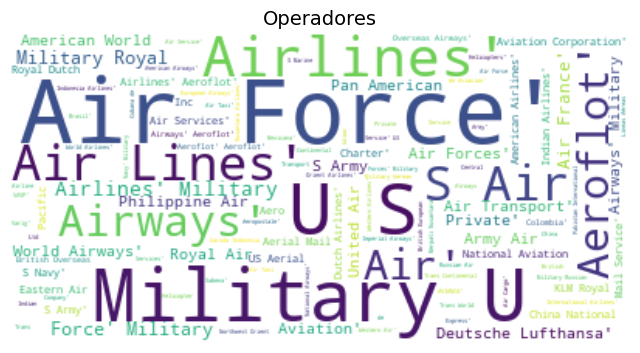

In [215]:
op_text = str(df_accident.operator.tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords)
wc.generate(op_text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.show()


La nube de palabras generada revela una clara preponderancia de operadores militares y fuerzas armadas en relación con los accidentes. 
Algunas de las palabras clave identificadas incluyen "Air Force" (Fuerza Aérea), "Military" (Militar), y "Royal Force" (Fuerza Real), lo que indica que los operadores militares, desempeñan un papel significativo en los eventos de aviación documentados. 

En este sentido, crearemos una nueva columna llamada 'type' para clasificar a los operadores en dos categorías: "military" y "Non military".

Es importante tener en cuenta que esta clasificación se realiza mediante una comparación de palabras clave y puede no ser precisa en todos los casos. Las palabras clave utilizadas incluyen términos como "Military", "Air Force", "Army", entre otros. Sin embargo, es posible que algunos operadores militares no utilicen estas palabras clave en su nombre, y viceversa.

Por lo tanto, los resultados deben interpretarse con cautela y considerar que la verdadera naturaleza de un operador puede ser más compleja que una simple comparación de palabras clave.


In [218]:
palabras_clave_militares = ["Military", "Air Force", "Army", "Navy", "Marine", "Soldier", "Combat", "War", "Defense", "Armed Forces", 'Force']


In [219]:
def military_op(operator):
    for palabra_clave in palabras_clave_militares:
        if palabra_clave.lower() in operator.lower():
            return "military"
    return "non military"

# Aplica la función a la columna 'operator' para crear la nueva columna 'type'
df_accident['type'] = df_accident['operator'].apply(military_op)

In [221]:
df_accident['type'].value_counts()

type
non military    4098
military         760
Name: count, dtype: int64

## Flight_number.

In [222]:
df_accident['flight_number'].unique()

KeyError: 'flight_number'

No están normalizados pero dejamos esta columna puesto que nos puede servir en un futuro si encontramos algún otro Dataset complementario con cual podamos realizar un merge. 

## Flight route.

In [223]:
flight_route_uniques = df_accident['flight_route'].unique()
flight_route_uniques

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [224]:
for i in flight_route_uniques:
    print(i)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

Observamos múltiples valores en las rutas, esto parece indicar que la información de las rutas es variada y no está estructurada de manera consistente, lo cual dificulta la posibilidad de transformaciones o análisis significativos sin unificar la estructura de los datos.

Además, la información de la ruta puede ser muy detallada y específica, pero a menudo no proporciona una ubicación precisa del accidente. Por ejemplo, "Paris - Hounslow" o "Warsaw - Prague - Strasbourg - Paris" pueden describir rutas largas que atraviesan múltiples ciudades, pero no indican el lugar exacto del accidente. Esto dificulta la identificación precisa de la ubicación del accidente.

En este sentido tomamos la decisión de centrarnos en el país donde ocurrió el accidente y la superficie en la que tuvo lugar. Esto proporciona una información más general y coherente que aún puede ser útil para analizar los accidentes y tomar decisiones relacionadas con la seguridad de la aviación. Además, los datos del país y la superficie son más fáciles de manejar y analizar.

En resumen, la decisión de descartar o no utilizar la información detallada de las rutas se basa en la falta de consistencia, la falta de precisión y la dificultad para realizar análisis significativos con estos datos.

## Aircraft Type

### Identificación de Valores Únicos

Luego, se obtiene una lista de valores únicos en la columna 'aircraft_type' utilizando el método `unique()`. Esto permite identificar todos los tipos de aeronaves presentes en el conjunto de datos.

In [225]:
aircraft_uniques = df_accident.aircraft_type.unique()
aircraft_uniques

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [226]:
df_accident['aircraft_type'].nunique()

2432

In [227]:
for i in aircraft_uniques:
    print(i)

Wright Flyer III
Wright Byplane
Dirigible
Curtiss seaplane
Zeppelin L-1 (airship)
Zeppelin L-2 (airship)
Zeppelin L-8 (airship)
Zeppelin L-10 (airship)
Schutte-Lanz S-L-10 (airship)
Zeppelin L-32 (airship)
Zeppelin L-31 (airship)
Super Zeppelin (airship)
Zeppelin L-34 (airship)
Airship
Schutte-Lanz S-L-9 (airship)
Zeppelin L-22 (airship)
Zeppelin L-43 (airship)
Zepplin L-48 (air ship)
Zeppelin L-44 (airship)
Zeppelin L-59 (airship)
Zeppelin L-70 (airship)
Zeppelin L-53 (airship)
De Havilland DH-4
FD Type Dirigible
Caproni Ca.48
Curtiss R-4LM
De Havilland DH.4
de Havilland DH-4
Curtiss JN-4H
Farman F-40
Armstrong-Whitworth F-K-8
Junkers JL-6
Junkers F-13
Salmson 2-A-2
Breguet 14
Handley Page HP-16
Avro 504
De Havilland DH-4
Royal Airship Works ZR-2 (airship)
Potez IX
Bristol 28 Tourer
Handley Page O/10
Dirigible Roma (airship)
Aeromarine Model 85 (flying boat)
de Havilland DH-18 / Farman F-60 Goliath

Bleriot Spad 27
LVG C VI
Potez 29
de Havilland DH-9
Lioré-et-Olivier H-13
Farman F-60 

### Asignación de Marcas a las Aeronaves.
A continuación, se define una lista llamada marcas_aeronaves que contiene nombres de marcas de aeronaves históricas. Luego, se utiliza una función llamada assign_brand() para asignar una marca a cada tipo de aeronave en función de la presencia de palabras clave de marca en la descripción del tipo de aeronave.

In [228]:
marcas_aeronaves = [
    'Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
    'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
    'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
    'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
    'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
    'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
    'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
    'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
    'Harbin Aircraft Manufacturing Corporation', 'English Electric',
    'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
    'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
    'Sopwith Aviation Company'
]


In [229]:
def assign_brand(type):
    for brand in marcas_aeronaves:
        for i in brand.split():
            if i.lower() in type.lower():
                return brand
    return 'other'

# Crear una columna 'brand' en el DataFrame
df_accident['brand'] = df_accident['aircraft_type'].apply(assign_brand)


Finalmente, filtramos los datos  para identificar las aeronaves para las cuales no se pudo asignar una marca ('other'). 

Este análisis y clasificación de datos es útil para comprender mejor la distribución de tipos de aeronaves y sus marcas asociadas en el conjunto de datos, así como para identificar las aeronaves para las cuales no se pudo asignar una marca. Esto puede ser valioso para futuros análisis y toma de decisiones.

In [230]:
brand_filter = df_accident[df_accident['brand'] == 'other']


## Total on board.

In [232]:
df_accident['total_on_board'].unique()

array(['2', '1', '5', '20', '28', '41', '19', '22', '23', '21', '24',
       '16', '18', '', '14', '0', '8', '3', '49', '45', '6', '7', '17',
       '4', '11', '52', '43', '15', '12', '9', '13', '54', '10', '76',
       '83', '50', '25', '97', '29', '36', '34', '37', '35', '26', '39',
       '31', '27', '30', '59', '44', '38', '32', '42', '53', '48', '40',
       '69', '33', '81', '58', '55', '46', '65', '51', '56', '63', '47',
       '70', '57', '115', '129', '66', '67', '74', '64', '128', '80',
       '62', '101', '159', '68', '79', '61', '73', '99', '60', '94', '72',
       '106', '78', '85', '122', '77', '88', '119', '95', '111', '107',
       '132', '112', '84', '105', '86', '118', '87', '103', '127', '153',
       '91', '117', '133', '124', '98', '82', '90', '130', '102', '155',
       '89', '120', '109', '100', '75', '229', '93', '126', '164', '218',
       '121', '92', '104', '156', '108', '174', '176', '202', '113',
       '182', '145', '134', '149', '177', '298', '346', '96',

In [237]:
df_accident['total_on_board'].fillna('', inplace=True)  

Convertirmos a valores numéricos. Cualquier valor no numérico o desconocido se trató como NaN para homogeneizar los datos.


In [238]:
df_accident['total_on_board'] = pd.to_numeric(df_accident['total_on_board'], errors= 'coerce')

In [234]:
df_accident.isna().sum()

date                     0
declared_time            0
location                 0
operator                 0
flight_route             1
aircraft_type            0
aircraft_registration    0
total_on_board           9
passengers_on_board      0
crew_on_board            0
total_fatalities         0
passenger_fatalities     0
crew_fatalities          0
ground_fatalities        0
summary                  0
country                  0
surface                  0
type                     0
brand                    0
dtype: int64

Filtrado y Eliminación:

Se identificaron y filtraron los registros donde el número total a bordo era igual a cero.

In [240]:
df_total_board = df_accident[df_accident['total_on_board'] == 0]
df_total_board

,date,declared_time,location,operator,flight_route,aircraft_type,aircraft_registration,total_on_board,passengers_on_board,crew_on_board,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,country,surface,type,brand
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,De Havilland DH-4,G-EAHG,0.0,0,1,0,0,0,0,Crashed into the sea while attempting to land ...,other,water,non military,De Havilland
120,1927-01-12,,"Estaires, France",Fokker,Delivery flight,Fokker F-VII,G-EBPL,0.0,0,2,0,0,2,0,The flight crew encountered poor weather condi...,France,ground,non military,Fokker
1121,1949-07-13,,"Jamnagar, Gujarat state, India",Indian Air Force,Training,Hawker Hunter,,0.0,1,1,0,1,1,14,Crashed into a garage near Jamnagar railway st...,India,ground,military,Hawker
3144,1981-09-22,12:00,"Near Babaeski, Turkey",Military - Turkish Air Force,,Northrop F-5A,,0.0,0,0,0,0,0,40,The fighter crashed into a village after the p...,Turkey,ground,military,Northrop Grumman
3376,1986-03-27,,"Bangui, Central African Republic",Military - French Air Force,,Sepecat Jaguar A,,0.0,0,0,0,0,0,35,The jet fighter crashed into a school shortly ...,Central African Republic,ground,military,other


Dado que el número de registros afectados era relativamente pequeño en comparación con el conjunto de datos total, su eliminación no impacta significativamente en el análisis. Esta acción se realizó para asegurar que los datos restantes sean representativos y adecuados para análisis posteriores, mejorando así la calidad y relevancia de los resultados.

In [241]:
df_accident = df_accident[df_accident['total_on_board'] != 0]


## Passengers on board.

Convertirmos a valores numéricos. Cualquier valor no numérico o desconocido se trató como NaN para homogeneizar los datos.


In [248]:
df_accident['passengers_on_board'] = pd.to_numeric(df_accident['passengers_on_board'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/625221471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['passengers_on_board'] = pd.to_numeric(df_accident['passengers_on_board'], errors='coerce')


In [244]:
df_accident['passengers_on_board'].unique()

array([  1.,   0.,  nan,  12.,   6.,   4.,   5.,   2.,   3.,   9.,   7.,
        13.,  10.,  11.,  14.,   8.,  37.,  18.,  15.,  36.,  16.,  21.,
        23.,  20.,  17.,  31.,  28.,  19.,  26.,  30.,  33.,  27.,  35.,
        24.,  22.,  25.,  55.,  46.,  40.,  47.,  29.,  38.,  49.,  44.,
        62.,  39.,  48.,  51.,  63.,  75.,  34.,  41.,  78.,  45.,  43.,
        54.,  50.,  32.,  52.,  59.,  64., 105., 122.,  57.,  70., 117.,
        56.,  53.,  74.,  60.,  95., 149.,  73.,  68.,  42.,  91.,  71.,
        86.,  67., 116.,  97.,  61.,  69.,  76., 115.,  77.,  79., 110.,
        87., 101.,  96., 102.,  85.,  94.,  80., 111.,  81., 114., 143.,
        66., 100., 106., 126., 113.,  93., 120.,  83.,  99.,  98.,  82.,
        89.,  72., 219.,  90., 118., 155., 197., 104., 108., 112., 148.,
       164., 163., 193., 166., 139.,  58., 141., 167., 279., 335.,  92.,
       144., 182., 314., 181., 124., 162., 146., 614., 156., 159., 190.,
       186., 128., 249., 258., 145., 237., 138., 15

In [245]:
df_accident.isnull().sum()

date                       0
declared_time              0
location                   0
operator                   0
flight_route               1
aircraft_type              0
aircraft_registration      0
total_on_board             9
passengers_on_board      173
crew_on_board              0
total_fatalities           0
passenger_fatalities       0
crew_fatalities            0
ground_fatalities          0
summary                    0
country                    0
surface                    0
type                       0
brand                      0
dtype: int64

In [246]:
df_passengers_on = df_accident[df_accident['passengers_on_board'].isna()]
df_passengers_on

,date,declared_time,location,operator,flight_route,aircraft_type,aircraft_registration,total_on_board,passengers_on_board,crew_on_board,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,country,surface,type,brand
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,Zeppelin L-1 (airship),,20.0,NaN,,14,,,0,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,,Zeppelin L-2 (airship),,28.0,NaN,,28,,,0,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,,Zeppelin L-10 (airship),,19.0,NaN,,19,,,0,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,Schutte-Lanz S-L-10 (airship),,20.0,NaN,,20,,,0,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01:00,"Billericay, England",Military - German Navy,,Zeppelin L-32 (airship),,22.0,NaN,,22,,,0,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,Mi-8,,28.0,NaN,,28,,,0,The military helicopter crashed after hitting ...,Tajikistan,ground,military,other
4791,2010-11-25,12:07,"Strezhevoy, Russia",NARZ,,Mil Mi-8T,RA-22376,10.0,NaN,,7,,,0,"The helicopter, which was delivering workers t...",Russia,ground,non military,other
4802,2011-04-19,13:57,"Tawang, India",Pawan Hans Helicopters Ltd.,,Mil Mi-172,VT-PHF,23.0,NaN,,18,,,0,The helicopter crashed into a hill as it attem...,India,ground,non military,other
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,Boeing CH-47 Chinook,,38.0,NaN,,38,,,0,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing


Evaluamos la posibilidad de imputar valores a passengers_on_board a partir de total_on_board y crew_on_board, para tratar valores faltantes pero cuando hay faltantes en passengers también lo hay en las otras, al haber otras columnas con información relevante y no representar una cantidad significativa que pueda afectar nuestro análisis, decidimos rellenar esos valores con un valor vacío.

In [247]:
df_accident['passengers_on_board'].fillna('', inplace=True)  

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/3521157881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['passengers_on_board'].fillna('', inplace=True)


## Crew on board.

In [253]:
df_accident['crew_on_board'] = pd.to_numeric(df_accident['crew_on_board'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/3322316533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['crew_on_board'] = pd.to_numeric(df_accident['crew_on_board'], errors='coerce')


In [251]:
df_accident.crew_on_board.isna().sum()

171

In [252]:
df_accident['crew_on_board'].fillna('', inplace=True)  

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/2467622560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['crew_on_board'].fillna('', inplace=True)


## Total fatalities.

In [257]:
df_accident['total_fatalities'] = pd.to_numeric(df_accident['total_fatalities'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/2015457311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['total_fatalities'] = pd.to_numeric(df_accident['total_fatalities'], errors='coerce')


In [255]:
df_accident.total_fatalities.isna().sum()

4

In [256]:
df_accident['total_fatalities'].fillna('', inplace=True)  

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/1257394989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['total_fatalities'].fillna('', inplace=True)


## Passenger fatalities.

In [262]:
df_accident['passenger_fatalities'] = pd.to_numeric(df_accident['passenger_fatalities'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/3533302654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['passenger_fatalities'] = pd.to_numeric(df_accident['passenger_fatalities'], errors='coerce')


In [260]:
df_accident.passenger_fatalities.isna().sum()

185

In [261]:
df_accident['passenger_fatalities'] = df_accident['passenger_fatalities'].fillna('')

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/3641637160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['passenger_fatalities'] = df_accident['passenger_fatalities'].fillna('')


## Crew fatalities.

In [266]:
df_accident['crew_fatalities'] = pd.to_numeric(df_accident['crew_fatalities'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/257696003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['crew_fatalities'] = pd.to_numeric(df_accident['crew_fatalities'], errors='coerce')


In [264]:
df_accident.crew_fatalities.isna().sum()

185

In [265]:
df_accident['crew_fatalities'].fillna('', inplace=True)  

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/3032831871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['crew_fatalities'].fillna('', inplace=True)


## Ground fatalities.

In [270]:
df_accident['ground_fatalities'] = pd.to_numeric(df_accident['ground_fatalities'], errors='coerce')


/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/1130085985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['ground_fatalities'] = pd.to_numeric(df_accident['ground_fatalities'], errors='coerce')


In [268]:
df_accident.ground_fatalities.isna().sum()

36

In [269]:
df_accident['ground_fatalities'].fillna('', inplace=True)  

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/1890912504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['ground_fatalities'].fillna('', inplace=True)


## Survivors.

Creamos una nueva columna resultante entre la resta de total_on_board y total_fatalities.

In [272]:
df_accident['survivors'] = df_accident['total_on_board'] - df_accident['total_fatalities']

/var/folders/5w/6sy3cr4d4t35b_h01s9cd7mr0000gn/T/ipykernel_35826/1181276917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident['survivors'] = df_accident['total_on_board'] - df_accident['total_fatalities']


### Chequeamos nuevamente nulos y porcentajes con respecto al dataset completo.

In [273]:
df_accident.isna().sum()

date                       0
declared_time              0
location                   0
operator                   0
flight_route               1
aircraft_type              0
aircraft_registration      0
total_on_board             9
passengers_on_board      173
crew_on_board            171
total_fatalities           4
passenger_fatalities     185
crew_fatalities          185
ground_fatalities         36
summary                    0
country                    0
surface                    0
type                       0
brand                      0
survivors                  9
dtype: int64

In [274]:
porcentaje_faltantes = (df_accident.isna().sum() / len(df_accident)) * 100
porcentaje_faltantes

date                     0.000000
declared_time            0.000000
location                 0.000000
operator                 0.000000
flight_route             0.020606
aircraft_type            0.000000
aircraft_registration    0.000000
total_on_board           0.185452
passengers_on_board      3.564805
crew_on_board            3.523594
total_fatalities         0.082423
passenger_fatalities     3.812075
crew_fatalities          3.812075
ground_fatalities        0.741809
summary                  0.000000
country                  0.000000
surface                  0.000000
type                     0.000000
brand                    0.000000
survivors                0.185452
dtype: float64

Vemos que hay bajo porcentaje de valores nulos por lo que no eliminaremos estos registros. 

## Summary.

Realizamos nueva nube de palabras sobre la columna "summary" para ver palabras más repetidas, las cuales pueden servirnos para posterior análisis.

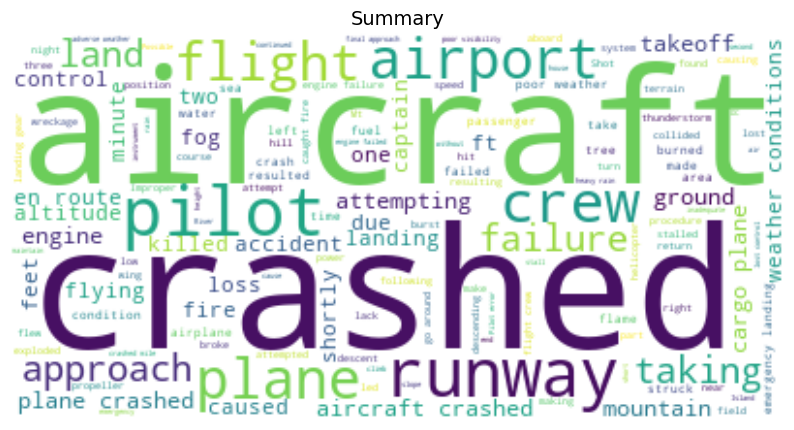

In [275]:
text = str(df_accident.summary.tolist())

stopwords = set(STOPWORDS)


wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Summary', loc='Center', fontsize=14)
plt.show()

# Análisis de Estadísticas Descriptivas de Accidentes de Aviación

En este análisis, examinamos un conjunto de datos que contiene información sobre accidentes de aviación registrados desde 1908 hasta 2021.

In [276]:
df_accident.describe()

,date,total_on_board,passengers_on_board,crew_on_board,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,survivors
count,4853,4844.000000,4680.000000,4682.000000,4849.000000,4668.000000,4668.000000,4817.000000,4844.000000
mean,1971-08-22 09:44:32.738512312,31.668662,27.291667,4.553182,22.635595,19.202228,3.610111,1.752335,9.012180
min,1908-09-17 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-09-12 00:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,1970-12-07 00:00:00,17.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,0.000000
75%,1992-08-21 00:00:00,35.000000,31.000000,6.000000,25.000000,21.000000,5.000000,0.000000,4.000000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,516.000000
std,NaN,46.015190,44.425777,3.784046,35.437090,34.373031,3.196259,56.330316,31.067311


### Total de Personas a Bordo

- El promedio de personas a bordo en los accidentes es de aproximadamente 31, con valores que oscilan entre 1 y 644.
- La mediana (valor central) es de alrededor de 16, lo que sugiere que la mayoría de los accidentes involucran a un número relativamente bajo de personas.
- El tercer cuartil indica que el 75% de los accidentes tienen 35 personas o menos a bordo.

### Fatalidades

- El promedio de fatalidades totales en los accidentes es de aproximadamente 22, con valores que van desde 0 hasta 583. Esta variabilidad resalta la diversidad de situaciones y gravedades en los accidentes de aviación.
- La mediana de fatalidades totales es de alrededor de 11, lo que sugiere que la mitad de los accidentes tienen 11 fatalidades o menos.
- Los valores de fatalidades muestran una amplia variabilidad.

### Supervivientes

- El promedio de supervivientes en los accidentes es de aproximadamente 9.
- Los valores de supervivientes también varían ampliamente en los accidentes. Los valores varían desde 0 (en algunos accidentes, no hubo supervivientes) hasta 516 (en un accidente, hubo 516 personas que sobrevivieron). Esta variabilidad muestra que hay una amplia gama de resultados en términos de supervivencia en los accidentes.
- La mayoría de los accidentes registrados tienen al menos algunos supervivientes. Esto indica que, en general, las personas tienen la capacidad de sobrevivir a los accidentes de aviación, y la ausencia total de supervivientes es relativamente poco común. Sin embargo, también hay casos excepcionales en los que un número significativo de personas logra sobrevivir, lo que destaca la importancia de la seguridad en la aviación y las operaciones de rescate.

### Fatalidades en Tierra

- Hay 4817 observaciones con valores para esta variable. La media es aproximadamente 1.75, lo que sugiere que, en promedio, hubo alrededor de 1.75 fatalidades en tierra en cada accidente.
- El valor mínimo es 0, lo que indica que en algunos accidentes no hubo fatalidades en tierra.
- La mayoría de los accidentes (75%) no tuvieron fatalidades en tierra.
- El valor máximo muestra que en el peor de los casos, hubo 2,750 fatalidades en tierra en un solo accidente.
- La desviación estándar es aproximadamente 55.52, lo que indica una variabilidad significativa en la cantidad de fatalidades en tierra en los accidentes.
- Es importante destacar que la mayoría de los accidentes tienen 0 fatalidades en tierra, como lo indican el valor mínimo y los cuartiles. Sin embargo, la presencia de un valor máximo extremadamente alto (2,750) indica que en casos excepcionales, los accidentes pueden resultar en un gran número de fatalidades en tierra. Esta estadística es crucial para comprender el impacto de los accidentes de aeronaves en personas que no estaban a bordo de la aeronave, como personas en el suelo o en edificios cercanos al lugar del accidente.

### Distribución de Personas a Bordo y Fatalidades

- Las columnas 'passengers_on_board' y 'crew_on_board' contienen valores nulos (NaN), indicando que no se tiene información sobre el número de pasajeros o tripulantes en algunos accidentes.
- La columna 'ground_fatalities' muestra un valor máximo inusualmente alto de 2750, lo que podría requerir una revisión adicional de los datos.

## Outliers.

In [280]:
df_accident.columns

Index(['date', 'declared_time', 'location', 'operator', 'flight_route',
       'aircraft_type', 'aircraft_registration', 'total_on_board',
       'passengers_on_board', 'crew_on_board', 'total_fatalities',
       'passenger_fatalities', 'crew_fatalities', 'ground_fatalities',
       'summary', 'country', 'surface', 'type', 'brand', 'survivors'],
      dtype='object')

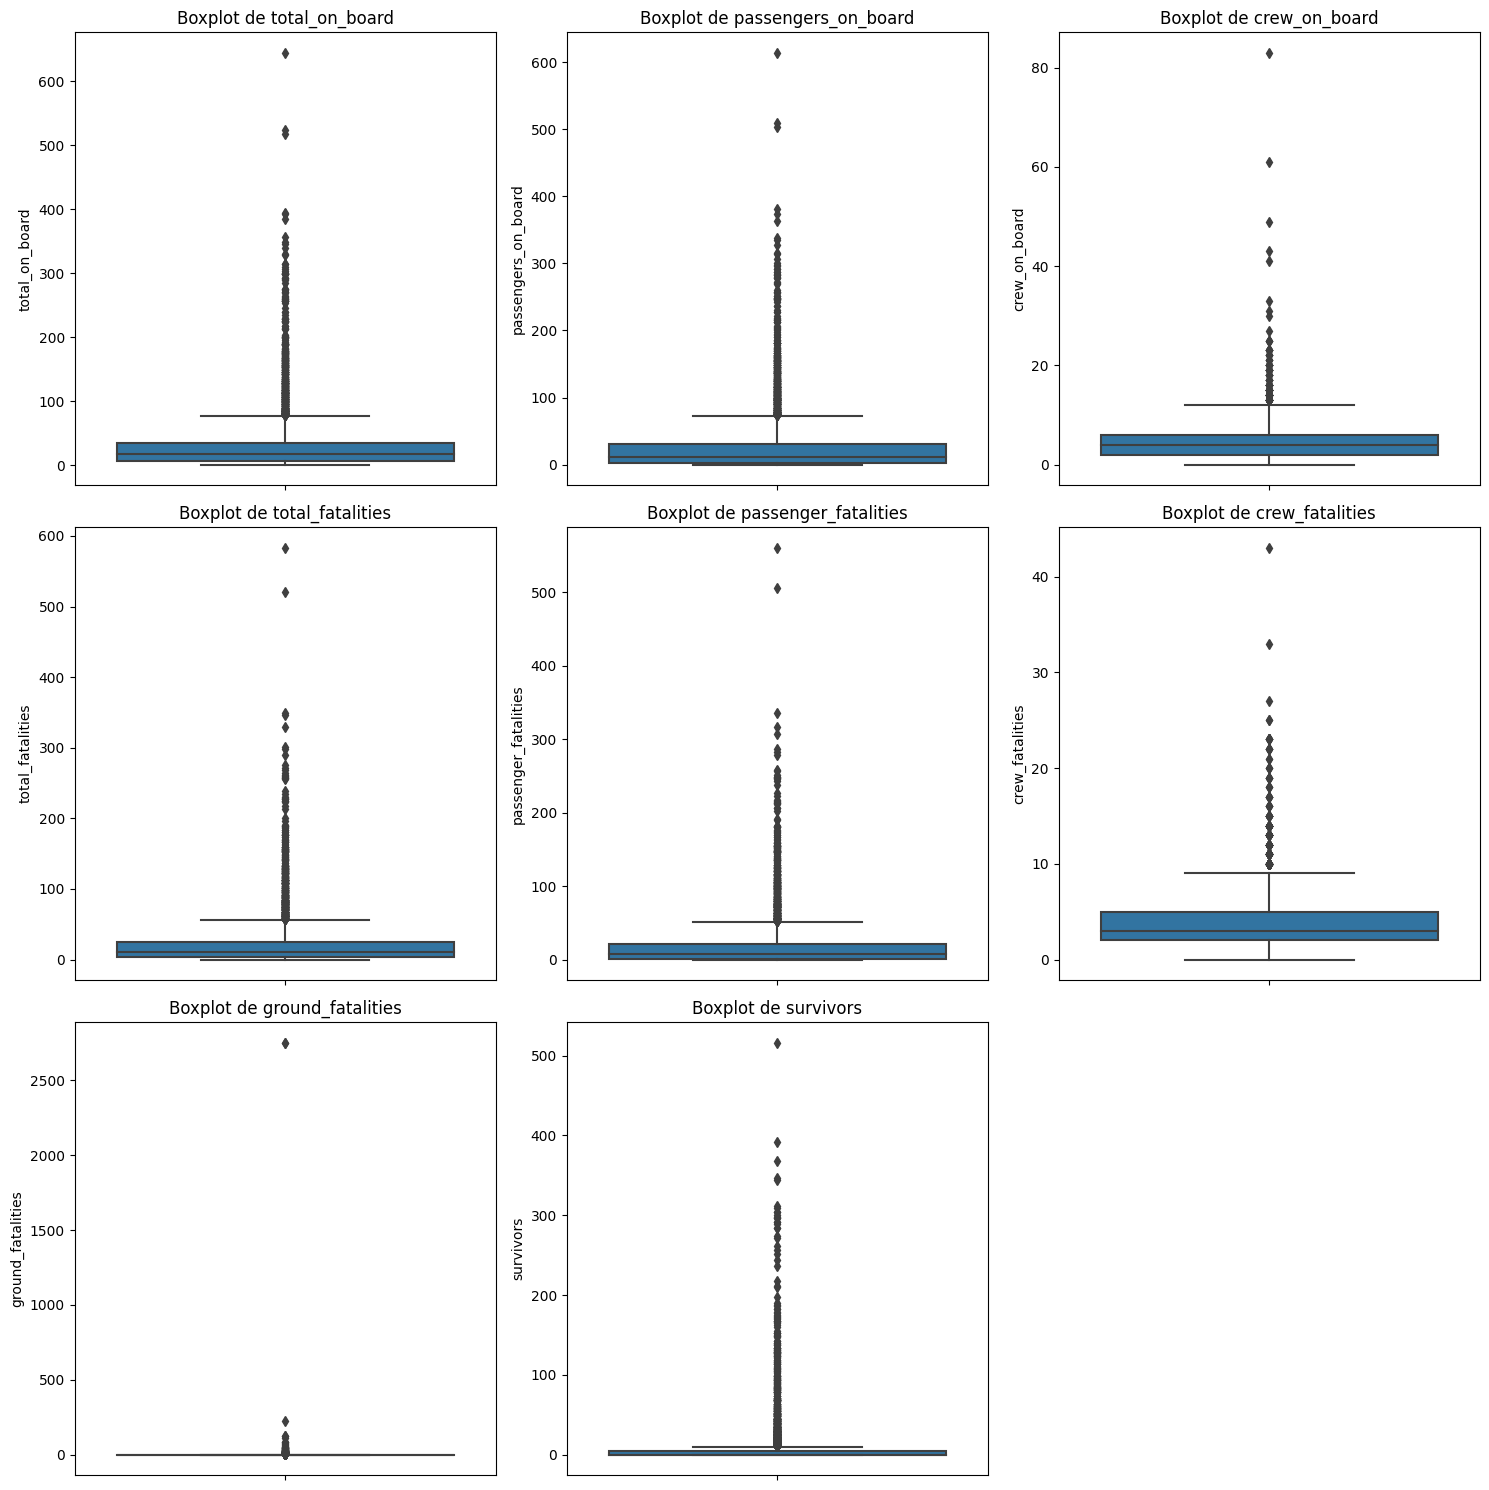

In [282]:
numeric_variables = ['total_on_board','passengers_on_board', 'crew_on_board', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground_fatalities', 'survivors']

plt.figure(figsize=(15, 15))  
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=df_accident, y=var)
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


In [293]:
df_accident[(df_accident['ground_fatalities']>2000)]

,date,declared_time,location,operator,flight_route,aircraft_type,aircraft_registration,total_on_board,passengers_on_board,crew_on_board,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,country,surface,type,brand,survivors
4346,2001-09-11,08:47,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,92.0,81.0,11.0,92.0,81.0,11.0,2750.0,The aircraft was hijacked shortly after it lef...,United States,ground,non military,Boeing,0.0
4347,2001-09-11,09:03,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,65.0,56.0,9.0,65.0,56.0,9.0,2750.0,The aircraft was hijacked shortly after it lef...,United States,ground,non military,Boeing,0.0


In [290]:
df_accident[(df_accident['crew_on_board']>40)]

,date,declared_time,location,operator,flight_route,aircraft_type,aircraft_registration,total_on_board,passengers_on_board,crew_on_board,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,country,surface,type,brand,survivors
6,1915-03-05,01:00,"Tienen, Belgium",Military - German Navy,,Zeppelin L-8 (airship),,41.0,0.0,41.0,17.0,0.0,17.0,0.0,Crashed into trees while attempting to land af...,Belgium,ground,military,other,24.0
60,1921-08-24,17:40,"River Humber, England",Military - Royal Airship Works,,Royal Airship Works ZR-2 (airship),R-38,49.0,0.0,49.0,43.0,0.0,43.0,1.0,Crashed due to structural failure followed by ...,England,water,military,other,6.0
102,1925-09-03,05:30,"Caldwell, Ohio",Military - U.S. Navy,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),ZR-1,43.0,0.0,43.0,14.0,0.0,14.0,0.0,The Shenandoah was flying over Southern Ohio w...,United States,ground,military,other,29.0
364,1935-02-12,,"Off Point Sur, Californiia",Military - US Navy,,Goodyear-Zeppelin U.S.S. Macon (airship),ZRS-4,83.0,0.0,83.0,2.0,0.0,2.0,0.0,The airship suffered structural failure in a s...,other,ground,military,other,81.0
462,1937-05-06,19:25,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,D-LZ-129,97.0,36.0,61.0,35.0,13.0,22.0,1.0,The airship Hindenburg caught fire and burned ...,United States,water,non military,other,62.0


La presencia de lo que parecen ser outliers puede deberse a la amplia gama de tipos de aeronaves y situaciones en los accidentes de aviación. Los diferentes tipos de aviones tienen capacidades y tamaños muy diferentes, lo que puede dar lugar a valores atípicos en algunas de las variables, como el número total de pasajeros a bordo o el número de tripulantes.

Es importante tener en cuenta el contexto y la naturaleza de los datos. No todos los valores que parecen outliers son necesariamente errores o anomalías; a veces, son simplemente representativos de situaciones legítimas y extremas.

Algunos datos de interés:

- El valor de ground de 2700, correspondiente a fatalidades en tierra, que parece un outlier, en realidad corresponde al atentado al World Trade Center, por lo que se trata de un valor correcto en ese contexto.

- En la variable "crew on board", en uno de los accidentes figuran 83 personas de tripulación, pero al inspeccionar más a fondo, se descubre que se trata de un zeppelin militar, y todos los tripulantes son parte de la tripulación en este caso particular.

- Dado que hay aviones con capacidad de hasta más de 600 personas, los valores que vemos en el boxplot como outliers en las variables relacionadas con el número de personas a bordo no son necesariamente atípicos, ya que reflejan la diversidad de tamaños y capacidades de las aeronaves involucradas en los accidentes.



## Histogramas.

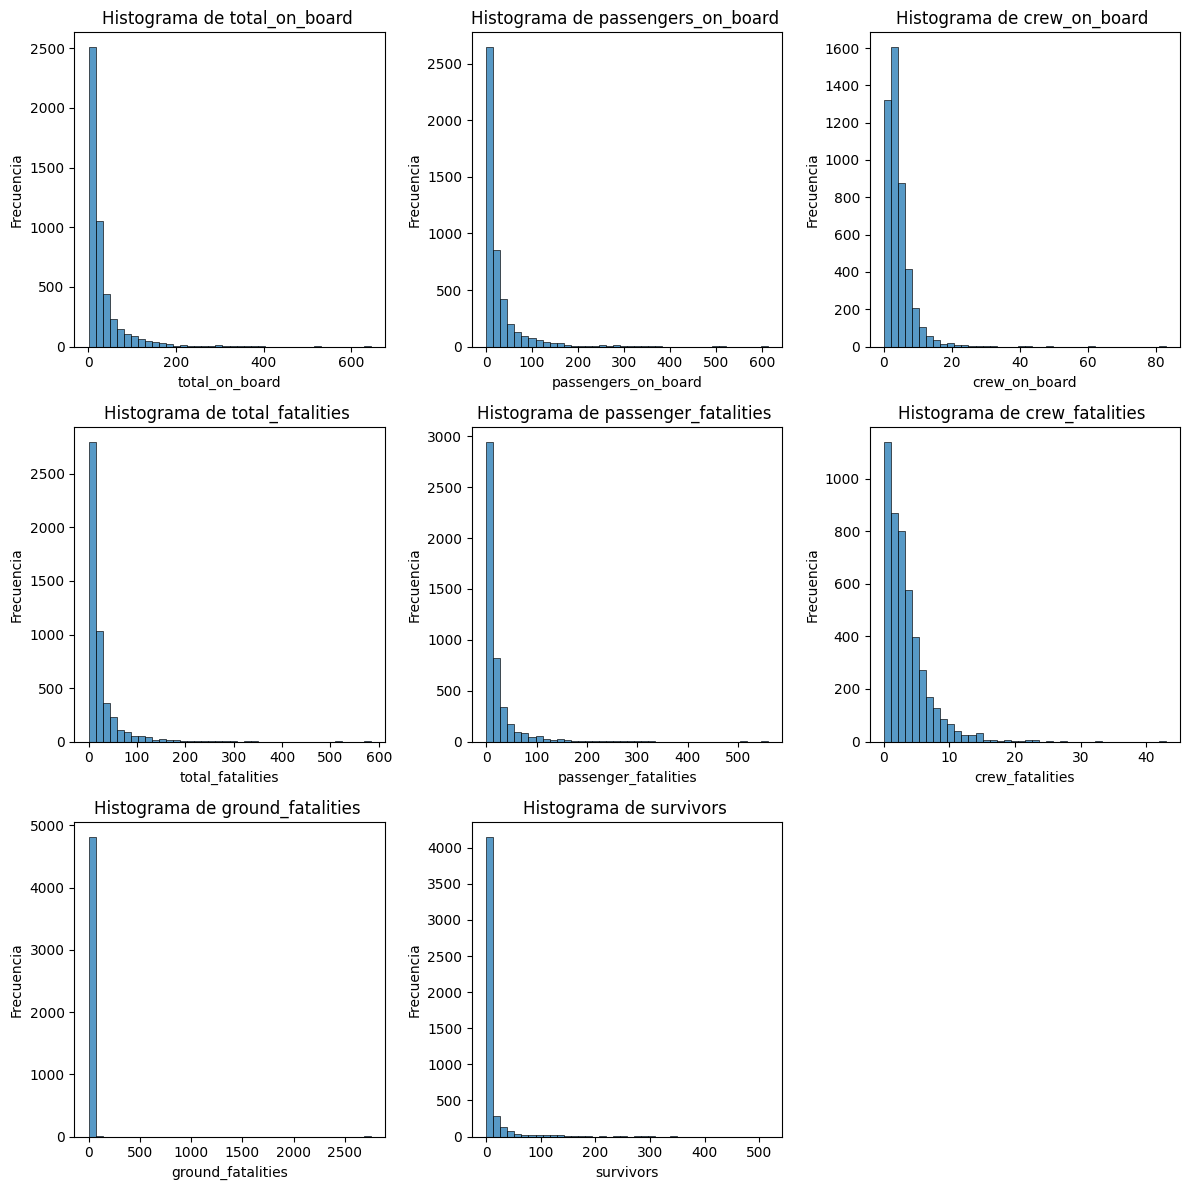

In [309]:

numeric_variables = ['total_on_board', 'passengers_on_board', 'crew_on_board', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground_fatalities', 'survivors']

plt.figure(figsize=(12, 12))

for i, var in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_accident, x=var, bins=40)
    plt.title(f'Histograma de {var} ')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


La observación de que los histogramas tienen barras más altas a la izquierda y disminuyen hacia la derecha se debe a la naturaleza de los datos y es una característica común en muchas distribuciones de datos del mundo real. Esto está relacionado con el concepto de asimetría en la distribución de datos. 

En estos gráficos la distribución se considera asimétrica a la derecha. Esto significa que hay valores bajos que son más frecuentes y valores altos que son menos frecuentes. En el contexto de los accidentes de aviación, esto podría significar que la mayoría de los accidentes tienen un número bajo de víctimas o pasajeros, pero ocasionalmente hay accidentes graves con un gran número de víctimas.

La disminución gradual de las barras hacia la derecha indica que hay valores extremadamente altos que son poco comunes pero aún posibles. En el caso de accidentes de aviación, esto podría reflejar que, aunque la mayoría de los accidentes son de menor gravedad, existe la posibilidad de que ocurran accidentes muy graves en términos de fatalidades.

En resumen, la asimetría en los histogramas de datos es común y puede proporcionar información importante sobre la distribución de esos datos. En el análisis de accidentes de aviación, esta asimetría refleja la variabilidad en la gravedad de los accidentes y la posible presencia de eventos excepcionales con un gran número de fatalidades.

## Variables Categóricas. Visualizaciones.

### Países con mayor cantidad de accidentes.
Limitamos los resultados a los 10 países más frecuentes


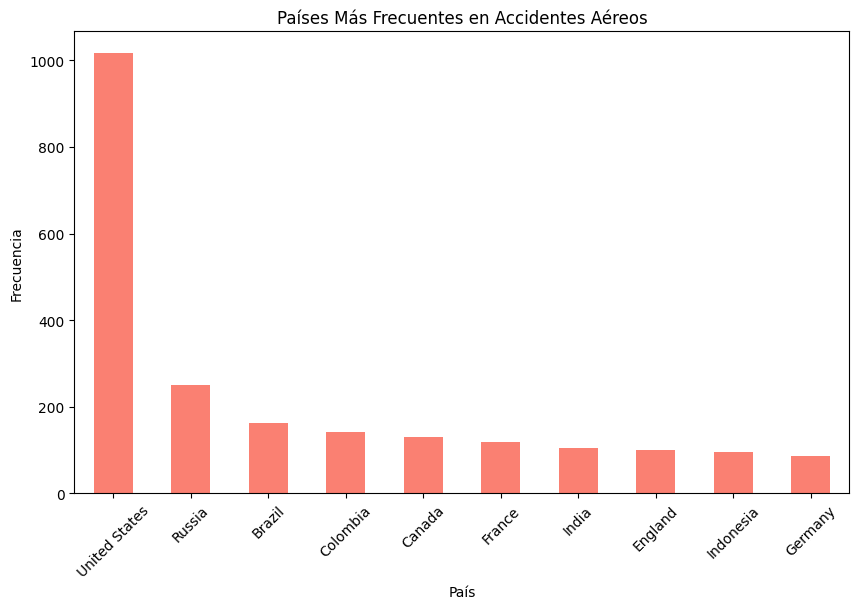

In [335]:
filtered_df = df_accident[df_accident['country'] != 'other']

country_counts = filtered_df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='salmon')
plt.title('Países Más Frecuentes en Accidentes Aéreos')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



### Operator.

Este gráfico te proporciona una representación visual de los operadores más frecuentes en accidentes aéreos, lo que puede ser útil para el análisis exploratorio de datos. Los operadores se muestran en orden descendente de frecuencia, lo que facilita la identificación de los operadores más prominentes en los datos.


Al analizar la seguridad de los operadores aéreos, es importante considerar más que simplemente el número de accidentes que han experimentado. Una métrica más precisa es el cálculo del ratio de accidentes por vuelo, que muestra la seguridad relativa de cada operador en función del número total de vuelos que realizan. Con los datos que tenemos no podemos afirmar que Aeroflot sea más insegura que otros operadores por cuanto no tenemos la cantidad de vuelos total por operadora. 

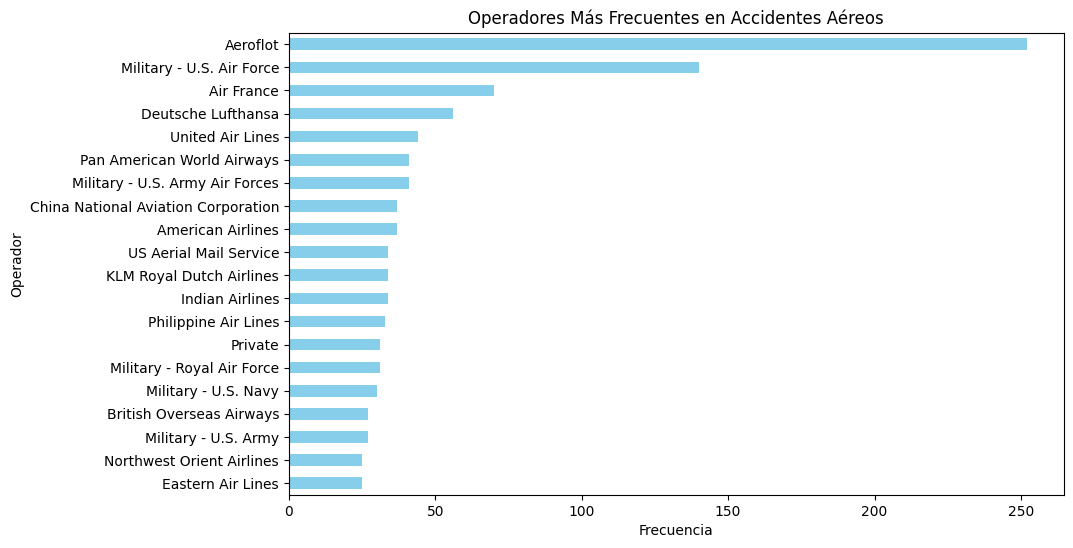

In [377]:
operator_counts = df_accident['operator'].value_counts().head(20)

operator_counts_sorted = operator_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
operator_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Operadores Más Frecuentes en Accidentes Aéreos')
plt.xlabel('Frecuencia')
plt.ylabel('Operador')
plt.show()

In [378]:
operator_counts_sorted = operator_counts_sorted.sort_values( ascending=False)


In [379]:
pd.DataFrame(operator_counts_sorted)

,count
operator,
Aeroflot,252
Military - U.S. Air Force,140
Air France,70
Deutsche Lufthansa,56
United Air Lines,44
Pan American World Airways,41
Military - U.S. Army Air Forces,41
American Airlines,37
China National Aviation Corporation,37


## Flight Route.

Obtenemos el valor más frecuente en la columna 'flight_route' sin realizar ninguna normalización. Esto significa que se busca el valor exacto que aparece con mayor frecuencia. Este gráfico proporciona una representación visual de los 10 valores más frecuentes. 

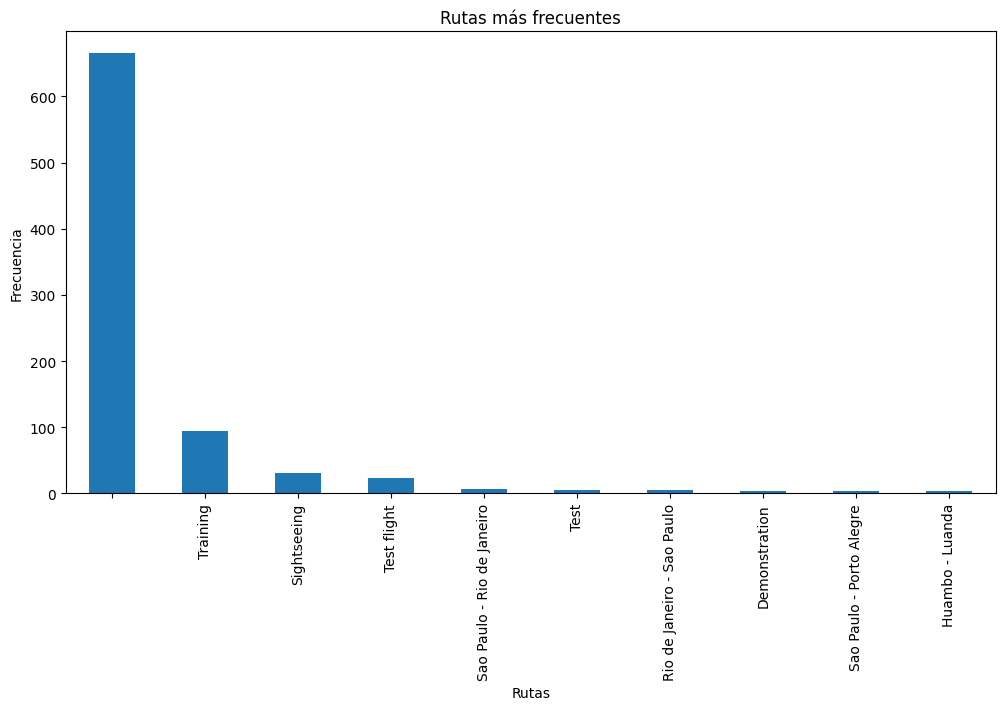

In [317]:
df_routes = pd.DataFrame({'routes': df_accident['flight_route']})
route_counts = df_routes['routes'].value_counts()

top_routes = route_counts.head(10)

plt.figure(figsize=(12, 6))
top_routes.plot(kind='bar')
plt.title('Rutas más frecuentes')
plt.xlabel('Rutas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  
plt.show()

## Tipo de vuelo más frecuentes en accidentes.

Notamos que muchos registros no contenían rutas sino tipos de maniobras de vuelo, por lo que filtramos los registros que no están en blanco ni contienen el carácter '-' (guiones) para eliminar las rutas de vuelo y quedarnos solo con los tipos de maniobras. Luego de esto graficamos y vemos que tenemos registros de accidentes mayoritariamente correspondientes a Training.

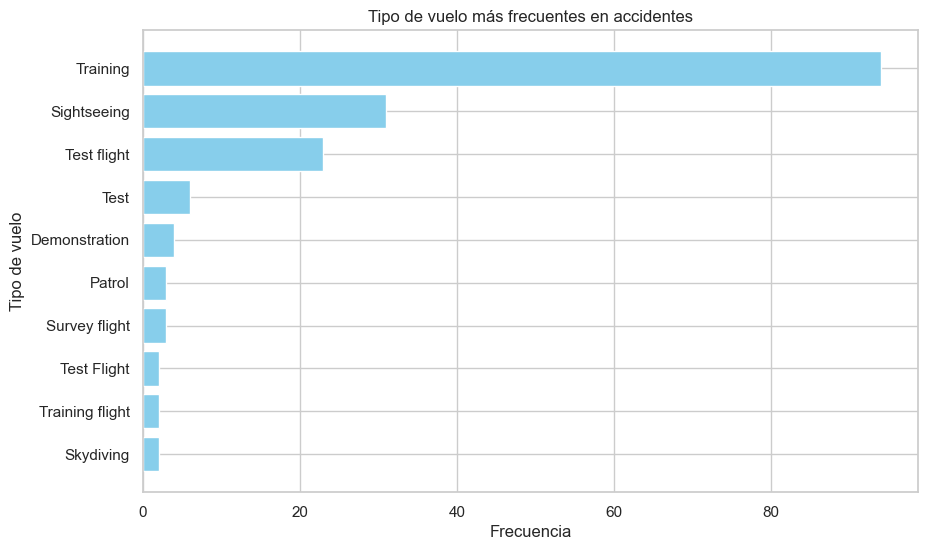

In [627]:
route_counts = df_accident['flight_route'].value_counts().reset_index()
route_counts.columns = ['flight_route', 'Frequency']

filtered_routes = route_counts[route_counts['flight_route'].str.strip() != '']
filtered_routes = filtered_routes[~filtered_routes['flight_route'].str.contains('-')]

filtered_routes['flight_route'] = filtered_routes['flight_route'].str.replace('Training.*', 'Training')
filtered_routes['flight_route'] = filtered_routes['flight_route'].str.replace('Test.*', 'Test flight')

top = filtered_routes.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top['flight_route'], top['Frequency'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de vuelo')
plt.title('Tipo de vuelo más frecuentes en accidentes')
plt.gca().invert_yaxis()  
plt.show()



### Aircraft Type.

Tipos de Aeronaves Más Frecuentes en Accidentes Aéreos.

Podemos observar en la visualización que la aeronave de la marca "McDonnell Douglas" es la que ha experimentado la mayor cantidad de accidentes en nuestro conjunto de datos. Sin embargo, es importante destacar que esta observación se basa en números absolutos y no proporciona información sobre la proporción de accidentes en relación con la cantidad total de vuelos de cada tipo de aeronave. Para obtener una evaluación más completa de la seguridad de estas aeronaves, sería necesario contar con datos adicionales, como el número total de vuelos realizados por cada tipo de aeronave.

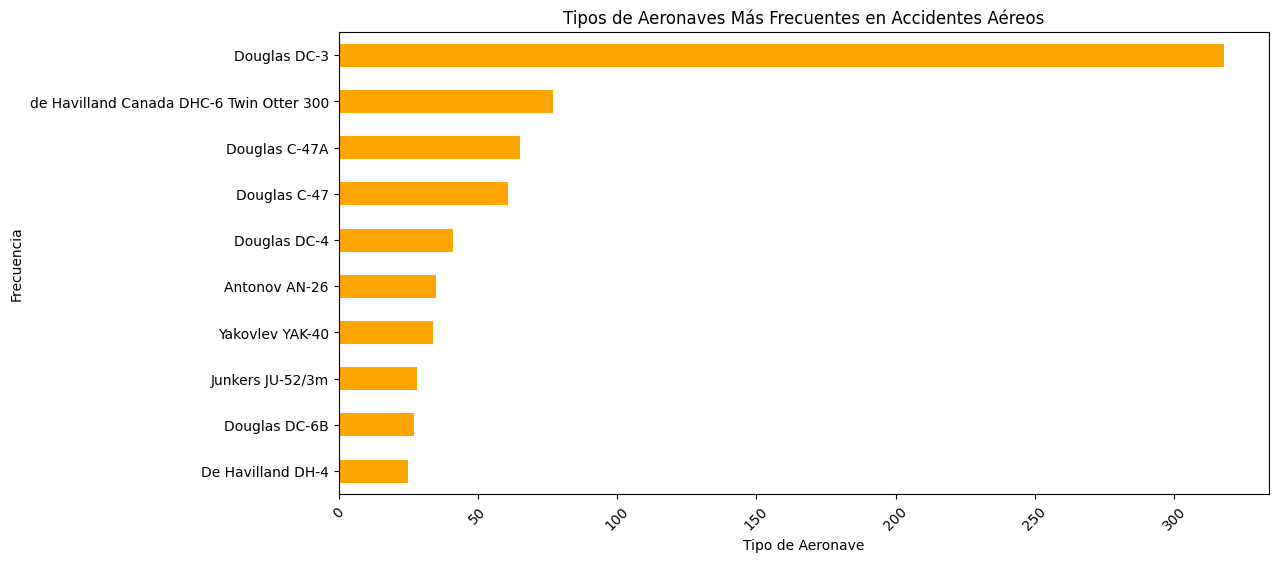

In [400]:
aircraft_type_counts = df_accident['aircraft_type'].value_counts().head(10)
aircraft_type_counts = aircraft_type_counts.sort_values( ascending=True)

plt.figure(figsize=(12, 6))
aircraft_type_counts.plot(kind='barh', color='orange')
plt.title('Tipos de Aeronaves Más Frecuentes en Accidentes Aéreos')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [401]:
aircraft_type_counts = aircraft_type_counts.sort_values( ascending=False)


In [402]:
aircraft_type_counts = pd.DataFrame(aircraft_type_counts)
aircraft_type_counts

,count
aircraft_type,
Douglas DC-3,318
de Havilland Canada DHC-6 Twin Otter 300,77
Douglas C-47A,65
Douglas C-47,61
Douglas DC-4,41
Antonov AN-26,35
Yakovlev YAK-40,34
Junkers JU-52/3m,28
Douglas DC-6B,27


### Brand.

Marcas de Aeronaves Más Frecuentes en Accidentes Aéreos.

Al examinar la columna "Brand," encontramos nuevamente que la marca "McDonnell Douglas" también lidera en términos de la cantidad de accidentes registrados. No obstante, como mencionamos previamente, esta información no nos permite calcular el ratio de accidentes en relación con la cantidad total de vuelos de cada marca. Para tener una comprensión más precisa de la seguridad de las aeronaves de estas marcas, sería necesario contar con datos adicionales que incluyan el número total de vuelos realizados por cada marca de aeronave.

En resumen, aunque podemos identificar las marcas y tipos de aeronaves con la mayor cantidad de accidentes en nuestros datos, la evaluación de su seguridad requeriría información adicional sobre el número total de vuelos realizados por cada marca y tipo de aeronave para calcular ratios de accidentes más informativos.

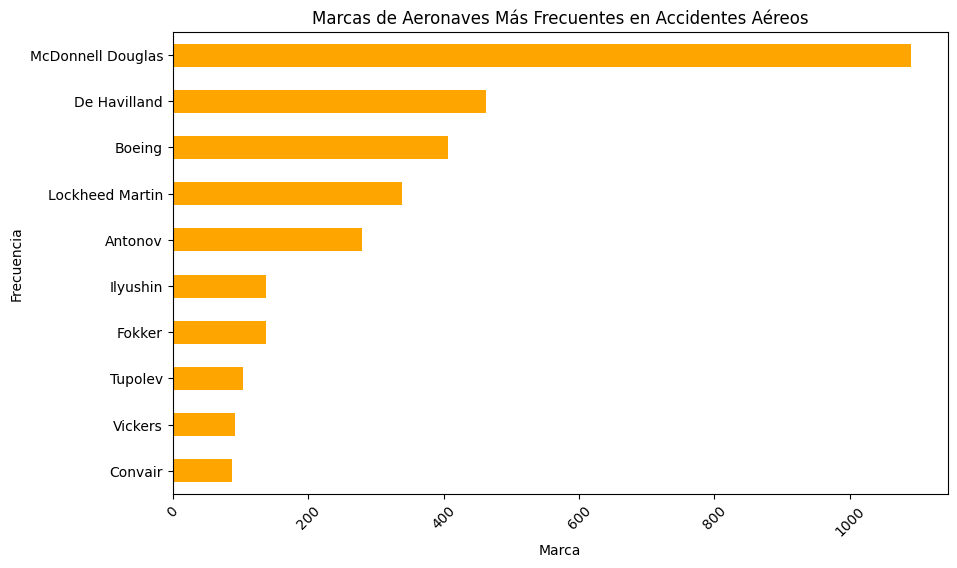

In [409]:
filtered_brands = df_accident[df_accident['brand'] != 'other']

brand_counts = filtered_brands['brand'].value_counts().head(10)

brand_counts_sorted = brand_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
brand_counts_sorted.plot(kind='barh', color='orange')
plt.title('Marcas de Aeronaves Más Frecuentes en Accidentes Aéreos')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [408]:
top_brands = pd.DataFrame(brand_counts)
top_brands

,count
brand,
McDonnell Douglas,1090
De Havilland,463
Boeing,406
Lockheed Martin,339
Antonov,280
Fokker,137
Ilyushin,137
Tupolev,104
Vickers,92


## Ground.

Tipos de Superficie Más Frecuentes en Accidentes Aéreos

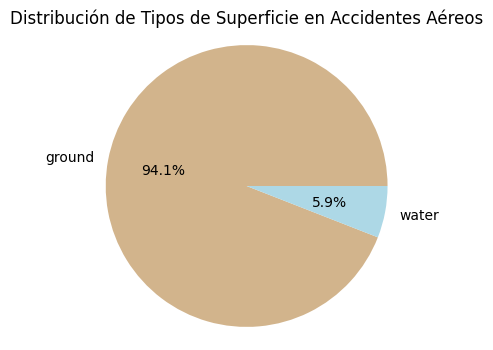

In [442]:
surface_counts = df_accident['surface'].value_counts()

colors = ['#D2B48C', '#ADD8E6']

plt.figure(figsize=(4,4))
plt.pie(surface_counts, labels=surface_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribución de Tipos de Superficie en Accidentes Aéreos')
plt.axis('equal')  
plt.show()


## Type. 

Distribución entre operaciones militares y no militares basada en la nueva columna que agregamos previamente.


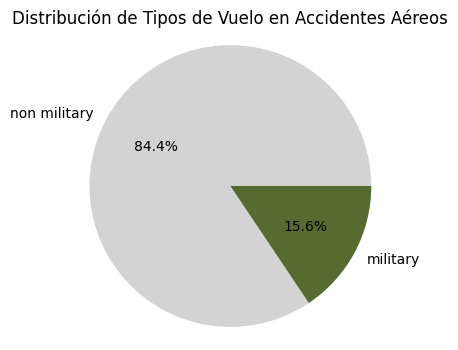

In [443]:
# Obtener la frecuencia de los tipos de vuelo más frecuentes
type_counts = df_accident['type'].value_counts()

colors = ['#D3D3D3', '#556B2F']

plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribución de Tipos de Vuelo en Accidentes Aéreos')
plt.axis('equal')  
plt.show()


## Fatalidades por Año.

Evolución de fatalidades por año.

Vemos que hasta los 70' la tendencia de fatalidades va en aumento esto podría ser producto del aumento de vuelos y por ende de personas utilizando este tipo de transporte. Este gráfico solo muestra un cambio en números absolutos y no una variación teniendo en cuenta la cantidad de vuelos o personas volando vs. la cantidad de fatalidades. 

Factores a tener en cuenta:

- **Aumento de la Aviación Comercial:** Durante estas décadas, la aviación comercial experimentó un rápido crecimiento. Se introdujeron aviones más grandes y se abrieron nuevas rutas aéreas, lo que llevó a un aumento en el número de vuelos y en la cantidad de personas que utilizaban el transporte aéreo. Cuanto más vuelos se realicen, mayor será la probabilidad de que ocurran incidentes o accidentes.

- **Tecnología y Seguridad:** La tecnología de aviación en las décadas anteriores a los años 70 no era tan avanzada como la que tenemos hoy en día. Los avances en tecnología y seguridad, como sistemas de navegación mejorados, controles de vuelo más avanzados y estándares de seguridad más estrictos, han contribuido a reducir la probabilidad de accidentes graves en la aviación.

- **Factores Externos:** Además, factores externos como condiciones meteorológicas adversas (en la actualidad hay protocolos más estrictos donde las aeronaves no están autorizadas a volar frente a condiciones metereológicas desfavorables) o conflictos militares pueden haber contribuido a un mayor número de accidentes durante ese período.

Para obtener una imagen más precisa de la seguridad en la aviación, es importante considerar la tasa de fatalidades en lugar de solo el número absoluto de fatalidades. La tasa de fatalidades se calcula dividiendo el número de fatalidades por el número total de pasajeros transportados (lo haremos a continuación) o el número total de vuelos operados. Esto proporciona una medida más precisa de la seguridad en la aviación, ya que tiene en cuenta el aumento en la actividad de vuelo y el número de personas transportadas.

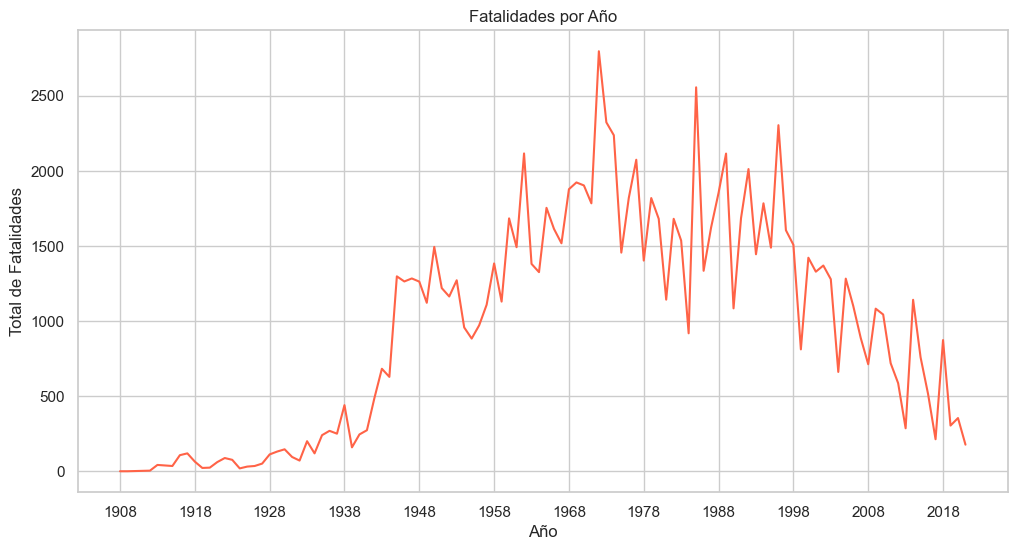

In [566]:
# Agrupa y suma las fatalidades totales por año en un nuevo DataFrame
fatalities_by_year = df_accident.groupby(df_accident['date'].dt.year)['total_fatalities'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(fatalities_by_year['date'], fatalities_by_year['total_fatalities'], color='tomato', linestyle='-')
plt.title('Fatalidades por Año')
plt.xlabel('Año')
plt.ylabel('Total de Fatalidades')
plt.grid(True)

# Establece los intervalos en el eje x para mostrar cada 10 años
plt.xticks(range(min(fatalities_by_year['date']), max(fatalities_by_year['date'])+1, 10))

plt.show()


In [574]:
fatalities_by_year

,date,total_fatalities
0,1908,1.0
1,1909,1.0
2,1912,5.0
3,1913,43.0
4,1915,36.0
...,...,...
106,2017,214.0
107,2018,874.0
108,2019,305.0
109,2020,355.0


## Fatalidades por Mes.

Todos muy similares pero Diciembre es el mes con más fatalidades históricas. Esto puede deberse a un aumento de vuelos en esas fechas. 

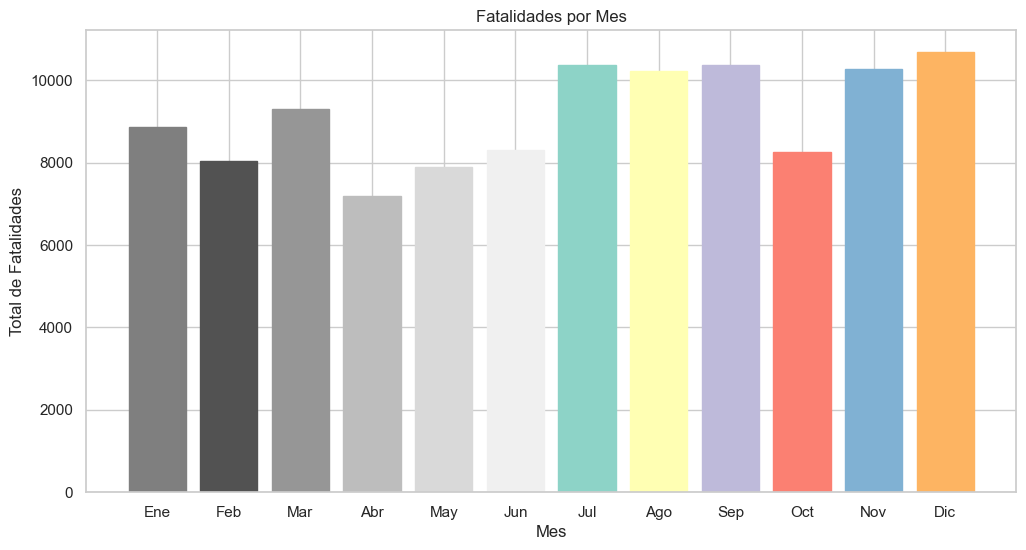

In [565]:
colores_meses = ['#7f7f7f', '#525252', '#969696', '#bdbdbd', '#d9d9d9', '#f0f0f0', 
                 '#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462']

plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, 13), fatalities_by_month['total_fatalities'])

# Asigna colores a las barras de cada mes
for i in range(12):
    bars[i].set_color(colores_meses[i])

plt.title('Fatalidades por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Fatalidades')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()


In [562]:
df_accident.columns

Index(['date', 'declared_time', 'location', 'operator', 'flight_route',
       'aircraft_type', 'aircraft_registration', 'total_on_board',
       'passengers_on_board', 'crew_on_board', 'total_fatalities',
       'passenger_fatalities', 'crew_fatalities', 'ground_fatalities',
       'summary', 'country', 'surface', 'type', 'brand', 'survivors', 'year',
       'month', 'hour', 'fatalities_to_passengers_ratio'],
      dtype='object')

## Fatalidades por Hora del Día.

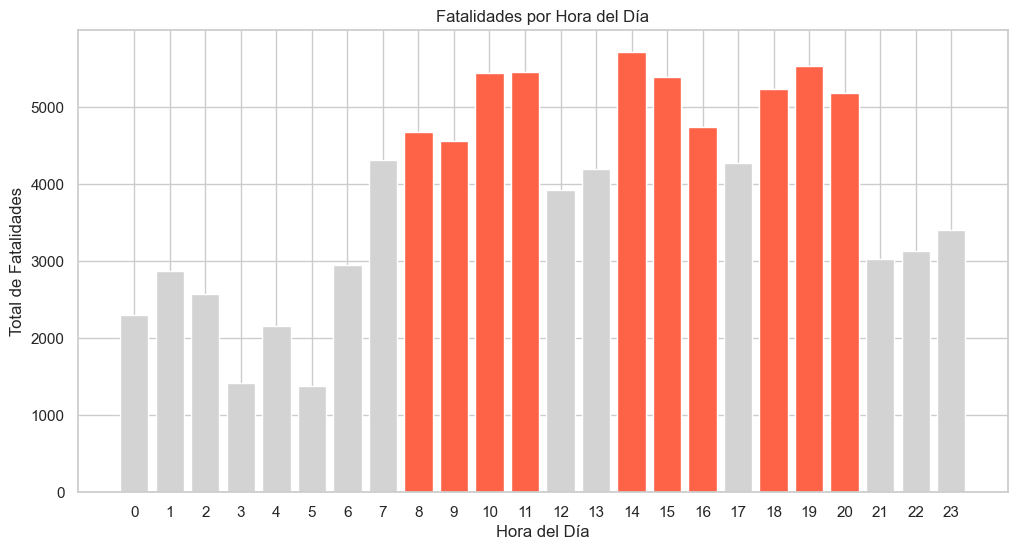

In [563]:
df_accident['declared_time'] = pd.to_datetime(df_accident['declared_time'], errors='coerce')

# Extrae la hora de la columna 'declared_time' sin agregarla al DataFrame
horas_del_dia = df_accident['declared_time'].dt.hour

# Agrupa y suma las fatalidades totales por hora del día en un nuevo DataFrame
fatalities_by_hour = df_accident.groupby(horas_del_dia)['total_fatalities'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(fatalities_by_hour.index, fatalities_by_hour.values, color='lightgray')
# Resalta en 'tomato' las barras con más de 4000 fatalidades
highlighted_bars = fatalities_by_hour[fatalities_by_hour > 4500]
plt.bar(highlighted_bars.index, highlighted_bars.values, color='tomato')

plt.title('Fatalidades por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Fatalidades')
plt.xticks(range(24))
plt.show()


## Promedio del Ratio de Fatalidades por Operador


El **ratio de fatalidades por persona a bordo** se utiliza para medir la proporción de fatalidades en un accidente aéreo en relación con el número total de personas a bordo de la aeronave. Este ratio se calcula utilizando la fórmula:

**Ratio de Fatalidades por Persona a Bordo** = Total de Fatalidades / Total de Personas a Bordo

Donde:
- **Total de Fatalidades**: la cantidad total de personas que fallecieron en el accidente.
- **Total de Personas a Bordo**: la suma de pasajeros y tripulación que estaban a bordo de la aeronave en el momento del accidente.

Este ratio proporciona información sobre la gravedad de un accidente aéreo en términos de la proporción de personas que fallecieron en relación con el número total de personas a bordo. Un mayor ratio sugiere una proporción más alta de fatalidades en relación con el número total de personas a bordo, lo que señala la gravedad de un accidente. En este contexto, es importante destacar que un alto ratio no necesariamente implica que todos los pasajeros morirán en un accidente. Más bien, refleja la necesidad de una mayor atención a la seguridad y el potencial para un mayor riesgo en situaciones de emergencia.

Por lo tanto, al considerar el historial de seguridad de una aerolínea, es esencial evaluar su promedio de ratios de fatalidades en accidentes pasados.

Calcular este ratio para diferentes operadores y mostrarlo en un gráfico de barras te permite comparar la seguridad relativa de los vuelos operados por diferentes compañías aéreas, ya que podrás ver cuál tiene un promedio de ratios de fatalidades más bajo o más alto en función de tus datos.



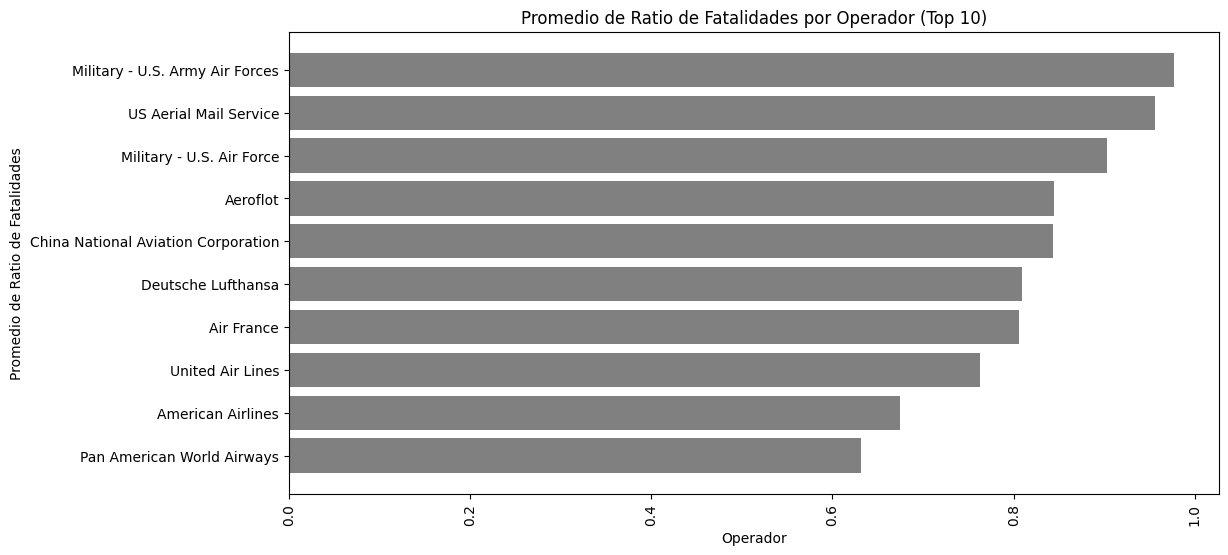

In [489]:
# Calcula el ratio de fatalidades por persona a bordo
df_accident['fatalities_to_passengers_ratio'] = df_accident['total_fatalities'] / df_accident['total_on_board']

# Obtén los 10 operadores con mayor número de accidentes
top_10_operators = df_accident['operator'].value_counts().head(10).index

# Filtra el DataFrame para incluir solo los accidentes de los 10 principales operadores
df_top_10_operators = df_accident[df_accident['operator'].isin(top_10_operators)]

operator_fatality_ratio = df_top_10_operators.groupby('operator')['fatalities_to_passengers_ratio'].mean()

operator_fatality_ratio_sorted = operator_fatality_ratio.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(operator_fatality_ratio_sorted.index, operator_fatality_ratio_sorted.values, color='grey')
plt.title('Promedio del ratio de Fatalidades por Operador (Top 10)')
plt.xlabel('Operador')
plt.ylabel('Promedio de Ratio de Fatalidades')
plt.xticks(rotation=90)
plt.show()



## Promedio del ratio de Fatalidades por tipo de Aeronave.

El "Promedio del ratio de Fatalidades por tipo de Aeronave" es una métrica que se utiliza para evaluar el nivel de seguridad de diferentes tipos de aeronaves en caso de accidentes. El objetivo es calcular cuántas personas en promedio fallecen en accidentes aéreos en relación con la cantidad total de personas a bordo de una aeronave de un tipo específico.

El cálculo del ratio es el siguiente:

**Ratio de Fatalidades por Tipo de Aeronave = Total de Fatalidades / Total de Personas a Bordo**

Donde:
- "Total de Fatalidades" es la suma de todas las personas que fallecieron en accidentes de aeronaves de ese tipo.
- "Total de Personas a Bordo" es la suma de todas las personas que estaban a bordo de aeronaves de ese tipo en el momento de los accidentes.

Este ratio proporciona una medida de la seguridad relativa de un tipo de aeronave en particular. Cuanto menor sea el ratio, mejor será la seguridad percibida, ya que indica que en promedio, en ese tipo de aeronave, fallecen menos personas en caso de accidente.

Por ejemplo, si el "Ratio de Fatalidades por Tipo de Aeronave" para un tipo específico de avión es 0.1, significa que en promedio, en los accidentes que involucran ese tipo de avión, fallece el 10% de las personas a bordo. En cambio, si el ratio es 0.5, en promedio fallece el 50% de las personas a bordo en accidentes de ese tipo de aeronave.

Este tipo de análisis es valioso para las autoridades de seguridad de la aviación y las aerolíneas, ya que les ayuda a evaluar qué tipos de aeronaves pueden ser más seguros y si es necesario tomar medidas para mejorar la seguridad en aeronaves de ciertos tipos.

Es importante destacar que este ratio es solo una medida de seguridad relativa y no debe considerarse como la única métrica para evaluar la seguridad de una aeronave. Otros factores, como el mantenimiento, la capacitación de la tripulación y la tecnología a bordo, también juegan un papel crucial en la seguridad de la aviación.

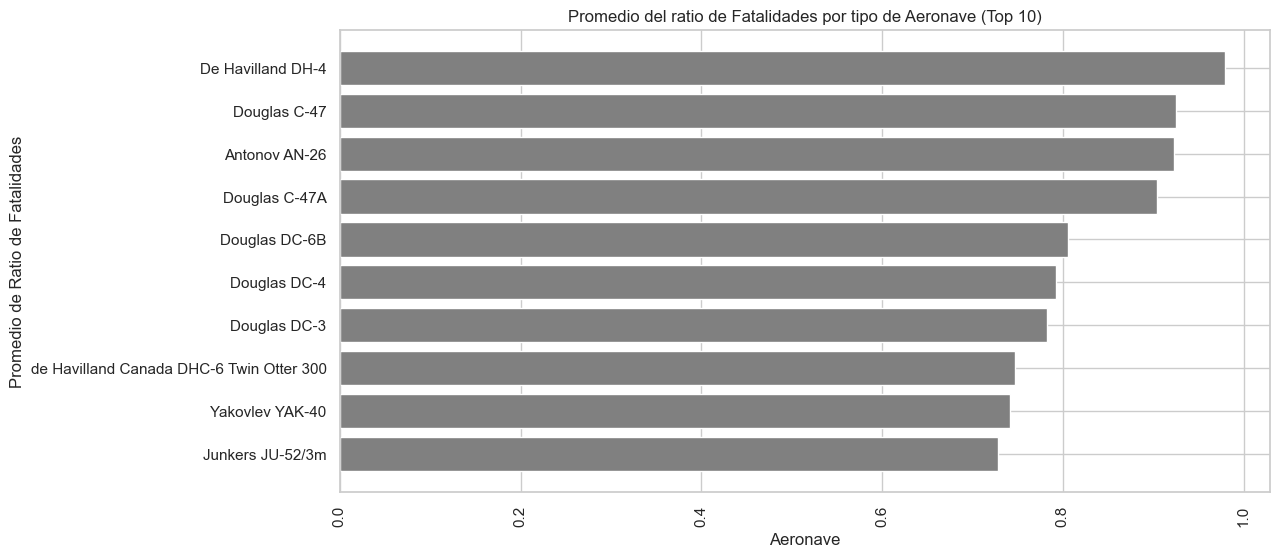

In [626]:

# Obtén los 10 operadores con mayor número de accidentes
top_10_aircraft_surv_ratio = df_accident['aircraft_type'].value_counts().head(10).index

# Filtra el DataFrame para incluir solo los accidentes de los 10 principales operadores
df_top_10_aircraft_surv = df_accident[df_accident['aircraft_type'].isin(top_10_aircraft_surv_ratio)]

# Agrupa por operador y calcula el promedio del ratio de fatalidades
aircraft_fatality_ratio = df_top_10_aircraft_surv.groupby('aircraft_type')['fatalities_to_passengers_ratio'].mean()

aircraft_fatality_ratio = aircraft_fatality_ratio.sort_values(ascending=True)



# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(aircraft_fatality_ratio.index, aircraft_fatality_ratio.values, color='grey')
plt.title('Promedio del ratio de Fatalidades por tipo de Aeronave (Top 10)')
plt.xlabel('Aeronave')
plt.ylabel('Promedio de Ratio de Fatalidades')
plt.xticks(rotation=90)
plt.show()

## Top 10 Operadores con Mayor Cantidad de Fatalidades.

Es necesario clarificar de que per se el hecho de que una aerolínea tenga un mayor número de fatalidades no necesariamente significa que sea menos segura que otras. Puede haber varias razones detrás de esto que no necesariamente están relacionadas con la seguridad intrínseca de la aerolínea. Aquí hay algunas de las razones por las cuales una aerolínea podría tener más fatalidades sin que eso signifique necesariamente que sea menos segura:

1. **Volumen de Operaciones:** Las aerolíneas que realizan un gran número de vuelos y transportan un gran número de pasajeros tienen más oportunidades de enfrentar incidentes o accidentes simplemente debido a su volumen de operaciones. Cuantas más veces una aerolínea opere vuelos, mayor será la probabilidad de que ocurra un incidente.

2. **Tamaño de la Flota:** Las aerolíneas más grandes tienden a tener flotas más grandes, lo que también aumenta las posibilidades de estar involucradas en un accidente. Una flota más grande significa más aeronaves en el aire, lo que aumenta la exposición al riesgo.

3. **Rutas y Destinos:** Las aerolíneas que vuelan a regiones geográficas o rutas con condiciones climáticas adversas o problemas de seguridad específicos pueden enfrentar un mayor riesgo de accidentes.

4. **Antigüedad:** Las aerolíneas más antiguas pueden tener un historial de operaciones más largo, lo que significa que han estado expuestas al riesgo durante más tiempo.


Por lo tanto, es importante tener en cuenta estas consideraciones al evaluar la seguridad de una aerolínea. La seguridad se evalúa mejor considerando varios indicadores y tomando en cuenta el contexto en el que opera.

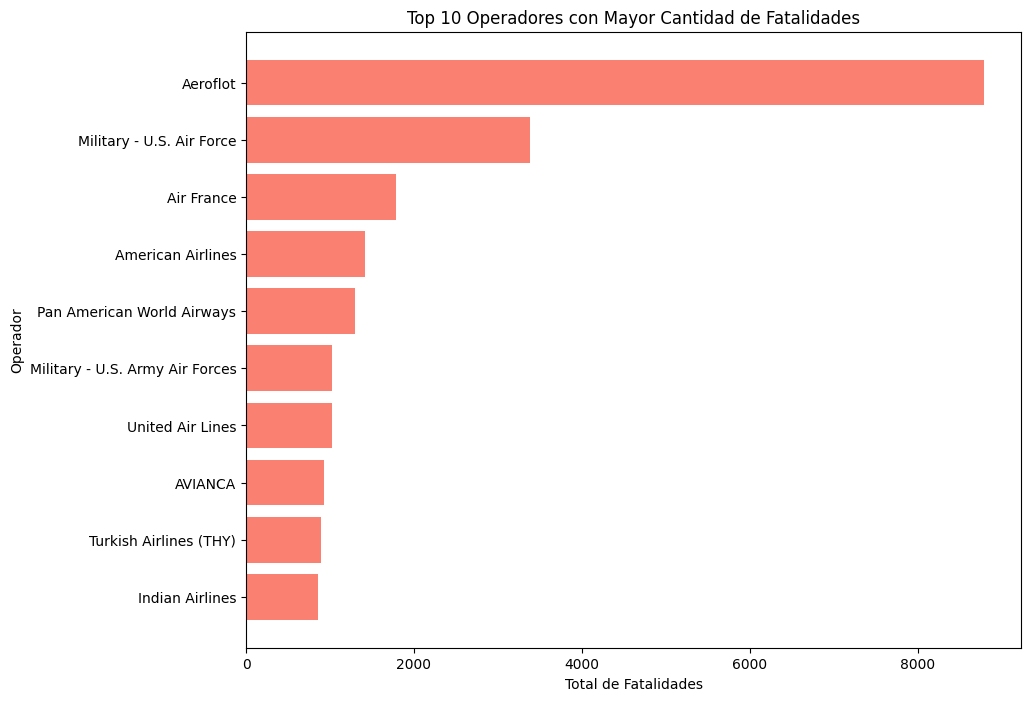

In [495]:
# Calcular la suma total de fatalidades por operador
fatalities_by_operator = df_accident.groupby('operator')['total_fatalities'].sum()

# Obtener los top 10 operadores con mayor cantidad de fatalidades y ordenarlos de mayor a menor
top_10_fatalities_operators = fatalities_by_operator.nlargest(10).sort_values(ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(top_10_fatalities_operators.index, top_10_fatalities_operators.values, color='salmon')
plt.title('Top 10 Operadores con Mayor Cantidad de Fatalidades')
plt.xlabel('Total de Fatalidades')
plt.ylabel('Operador')
plt.show()



## Operator, total on board y total fatalities. 

Creamos un nuevo Dataframe para visualizar mejor estas columnas juntas y nos quedamos con el top 10 teniendo en cuenta total fatalities y agrupando por operador. 

In [628]:
df_new = df_accident[['total_on_board', 'operator', 'total_fatalities']]
# Agrupar por operador y sumar 'total_on_board' y 'total_fatalities'
df_f = df_new.groupby('operator').agg({'total_on_board': 'sum', 'total_fatalities': 'sum'}).reset_index()



In [629]:
# Ordenar el DataFrame agrupado por 'total_fatalities_sum' de mayor a menor
df_f_sorted = df_f.sort_values(by='total_fatalities', ascending=False)

# Tomar los 10 primeros operadores
top_10_f = df_f_sorted.head(10)

# Mostrar el DataFrame con los 10 primeros operadores
top_10_f

,operator,total_on_board,total_fatalities
81,Aeroflot,11221.0,8792.0
1376,Military - U.S. Air Force,4101.0,3383.0
184,Air France,2954.0,1787.0
348,American Airlines,2122.0,1422.0
1565,Pan American World Airways,3097.0,1303.0
1386,Military - U.S. Army Air Forces,1056.0,1026.0
2103,United Air Lines,2461.0,1019.0
22,AVIANCA,1049.0,934.0
2070,Turkish Airlines (THY),956.0,890.0
960,Indian Airlines,1451.0,860.0


## Total on Board y Total Fatalities por Operador.

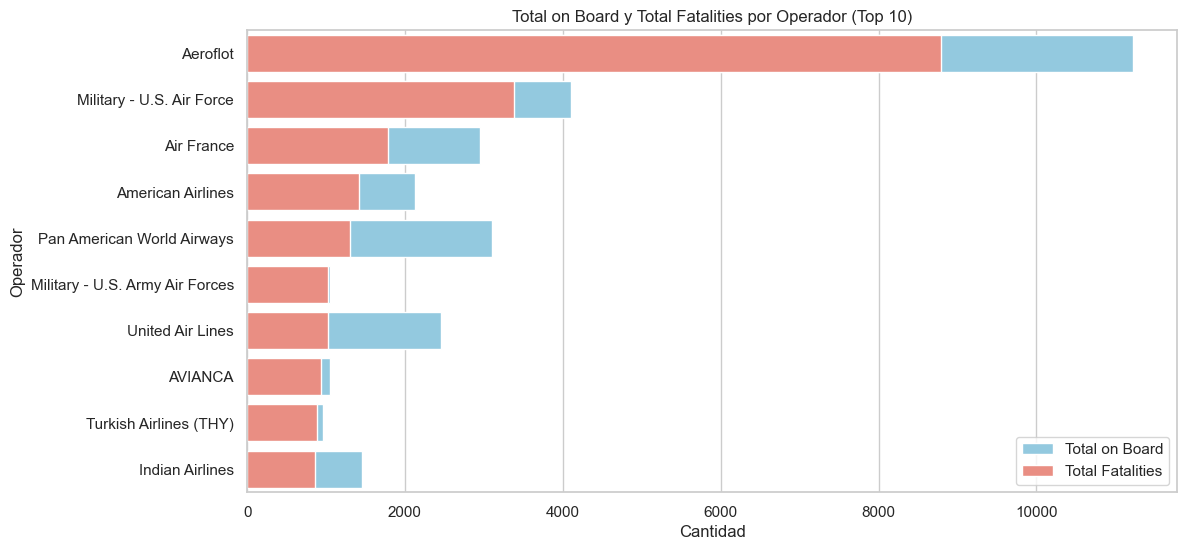

In [549]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='total_on_board', y='operator', data=top_10_f, color='skyblue', label='Total on Board')
sns.barplot(x='total_fatalities', y='operator', data=top_10_f, color='salmon', label='Total Fatalities')
plt.xlabel('Cantidad')
plt.ylabel('Operador')
plt.title('Total on Board y Total Fatalities por Operador (Top 10)')
plt.legend()
plt.show()


## Total on board y total fatalities por año.

In [593]:
# Agrupa por año y calcula las sumas de total_fatalities y total_on_board
df_fatalities_year = df_accident.groupby(df_accident['date'].dt.year).agg({
    'total_fatalities': 'sum',
    'total_on_board': 'sum'
}).reset_index()

df_fatalities_year

,date,total_fatalities,total_on_board
0,1908,1.0,2.0
1,1909,1.0,1.0
2,1912,5.0,5.0
3,1913,43.0,49.0
4,1915,36.0,60.0
...,...,...,...
106,2017,214.0,245.0
107,2018,874.0,1239.0
108,2019,305.0,432.0
109,2020,355.0,703.0


Agregamos columna de ratio de muertes y personas a bordo. 

In [667]:
df_fatalities_year['on_board_fatalities_ratio'] = df_fatalities_year['total_fatalities'] / df_fatalities_year['total_on_board'] 

## Ratio muertes y total a bordo.

Este gráfico tiene como objetivo principal proporcionar una representación visual de cómo ha variado la proporción de fatalidades en relación con el número de personas a bordo de las aeronaves a lo largo del tiempo. En la industria de la aviación, es fundamental evaluar la seguridad y analizar los patrones de accidentes para implementar medidas de mejora continua. El análisis de la relación entre fatalidades y el total de personas a bordo a lo largo de los años puede ofrecer valiosas perspectivas sobre la seguridad de la aviación.

**Fórmula:**
El ratio de fatalidades por persona a bordo se calcula utilizando la siguiente fórmula:

Ratio de Fatalidades por Persona a Bordo = Total de Fatalidades/Total de Personas a Bordo

Donde:
- **Total de Fatalidades:** Es la cantidad total de personas que fallecieron en accidentes aéreos en un año específico.
- **Total de Personas a Bordo:** Es la suma de pasajeros y tripulación que se encontraban a bordo de las aeronaves en el mismo período.

En el gráico observamos mayoritariamente una tendencia de mínimos decrecientes a lo largo de los años, esto podría indicar mejoras en la seguridad de la industria. Por otro lado, los picos en el ratio podrían señalar problemas de seguridad que necesitan atención inmediata.

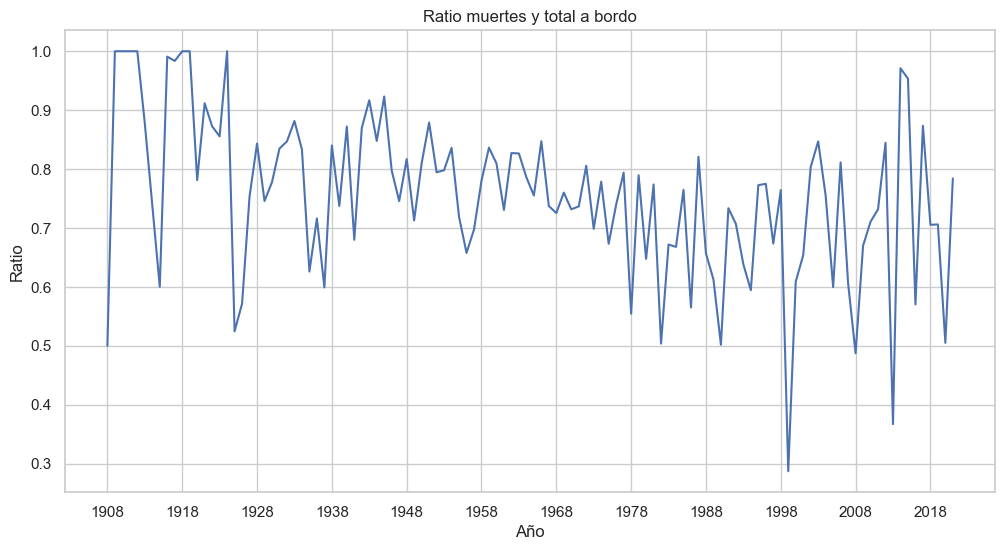

In [669]:
plt.figure(figsize=(12, 6))
plt.plot(df_fatalities_year['date'], df_fatalities_year['on_board_fatalities_ratio'], linestyle='-')
plt.title('Ratio muertes y total a bordo')
plt.xlabel('Año')
plt.ylabel('Ratio')
plt.grid(True)

# Establecer los intervalos en el eje x para mostrar cada 10 años
plt.xticks(range(min(df_fatalities_year['date']), max(df_fatalities_year['date']) + 1, 10))

plt.show()


In [670]:
df_fatalities_year

,date,total_fatalities,total_on_board,on_board_fatalities_ratio
0,1908,1.0,2.0,0.500000
1,1909,1.0,1.0,1.000000
2,1912,5.0,5.0,1.000000
3,1913,43.0,49.0,0.877551
4,1915,36.0,60.0,0.600000
...,...,...,...,...
106,2017,214.0,245.0,0.873469
107,2018,874.0,1239.0,0.705408
108,2019,305.0,432.0,0.706019
109,2020,355.0,703.0,0.504979


## Total Fatalities vs. Total On Board.

Vemos una clara correlación entre fatalidad y cantidad de personas a bordo de la aeronave, cuando hubo aumento de cantidad de personas volando, hubo por consiguiente mayor cantidad de fatalidades, lo que sería interesante analizar sería cantidad de vuelos a lo largo de los años vs. cantidad de fatalidades o accidentes. 

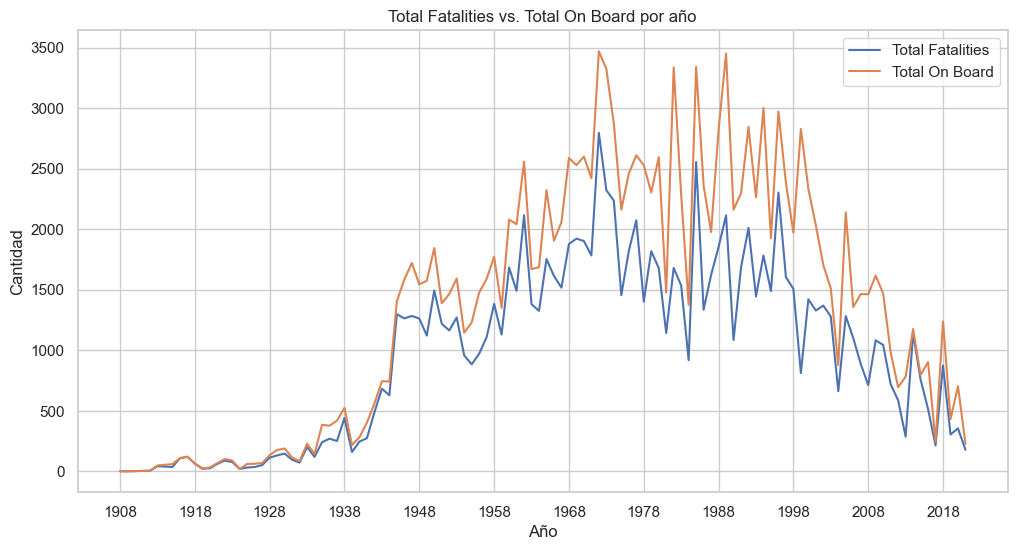

In [637]:
plt.figure(figsize=(12, 6))
plt.plot(df_fatalities_year['date'], df_fatalities_year['total_fatalities'], label='Total Fatalities')
plt.plot(df_fatalities_year['date'], df_fatalities_year['total_on_board'], label='Total On Board')


plt.title('Total Fatalities vs. Total On Board por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.legend()

# Establece los intervalos en el eje x para mostrar cada 10 años
plt.xticks(range(min(df_fatalities_year['date']), max(df_fatalities_year['date']) + 1, 10))

plt.show()


## Top 10 Aeronaves con Mayor Cantidad de Fatalidades.

El gráfico tiene como objetivo mostrar las aeronaves que han estado involucradas en la mayor cantidad de accidentes aéreos con fatalidades. Proporciona una visión general de las aeronaves que han experimentado los incidentes más trágicos en términos de pérdida de vidas. Este análisis es fundamental para identificar aeronaves que puedan requerir una revisión de seguridad, retirada o actualización de equipos.

**Proceso de Análisis:**
- El análisis comienza por agrupar los datos en función del tipo de aeronave (columna 'aircraft_type') y calcular la suma total de fatalidades asociadas con cada tipo de aeronave.
- Luego, se seleccionan las 10 aeronaves con la mayor cantidad de fatalidades y se ordenan de menor a mayor en el gráfico de barras horizontal.

Este análisis es fundamental para la industria de la aviación, ya que ayuda a identificar tendencias y patrones relacionados con la seguridad de aeronaves específicas. Revela cuáles son las aeronaves que han estado involucradas en los accidentes más mortales, lo que puede llevar a investigaciones y revisiones exhaustivas de seguridad para prevenir futuros incidentes similares.

- **Identificación de Aeronaves de Alto Riesgo:** El gráfico podría identificar aeronaves que han tenido un historial problemático en términos de seguridad y que podrían requerir una atención especial en términos de mantenimiento, revisión de diseño o retirada.
  

De todas maneras, es esencial tener en cuenta que el gráfico se basa exclusivamente en la suma total de fatalidades asociadas con cada tipo de aeronave. Esto significa que no se están teniendo en cuenta otros factores clave que también influyen en la seguridad de la aviación, como el número de personas a bordo, el número total de vuelos realizados por cada tipo de aeronave, las condiciones meteorológicas, la edad de la aeronave, la experiencia de la tripulación y otros aspectos operativos.


Dicho esto no podemos concluir que una aeronave es inherentemente insegura basándonos únicamente en la cantidad de fatalidades registradas. Pueden existir numerosos factores externos e internos que contribuyan a los accidentes y fatalidades.

**Complemento con el Ratio de Fatalidades:** Para una comprensión más completa de la seguridad de una aeronave en particular, es fundamental considerar el "Ratio de Fatalidades por Persona a Bordo" que se mencionó anteriormente. Este ratio tiene en cuenta la proporción de fatalidades en relación con el número total de personas a bordo, lo que proporciona una visión más precisa de la seguridad en términos de pérdida de vidas. Por ejemplo, si tomamos solo este gráfico de cantidad de fatalidades vemos al Douglas DC-3 primero con creces, ahora bien la misma aeronave tiene uno de los ratios de fatalidades más bajos del top10, es decir que en caso de accidentes es más probable que más personas a bordo sobrevivan que en otras aeronaves que ni siquiera están presentes en este gráfico como Havilland DH 4. Asimismo, el Douglas DC-3 tiene un ratio de fatalidad altísimo pero la explicación anterior sirve para reforzar la idea de que no podemos quedarnos con un solo gráfico o métrica si no queremos hacer un análisis sesgado. 

**Conclusión:** Si bien este análisis puede resaltar aeronaves con un historial de accidentes más mortales, no es la única métrica para evaluar la seguridad de la aviación. Debe combinarse con otros datos y análisis más detallados para obtener una imagen completa y precisa de la seguridad de las aeronaves y la industria de la aviación en general.



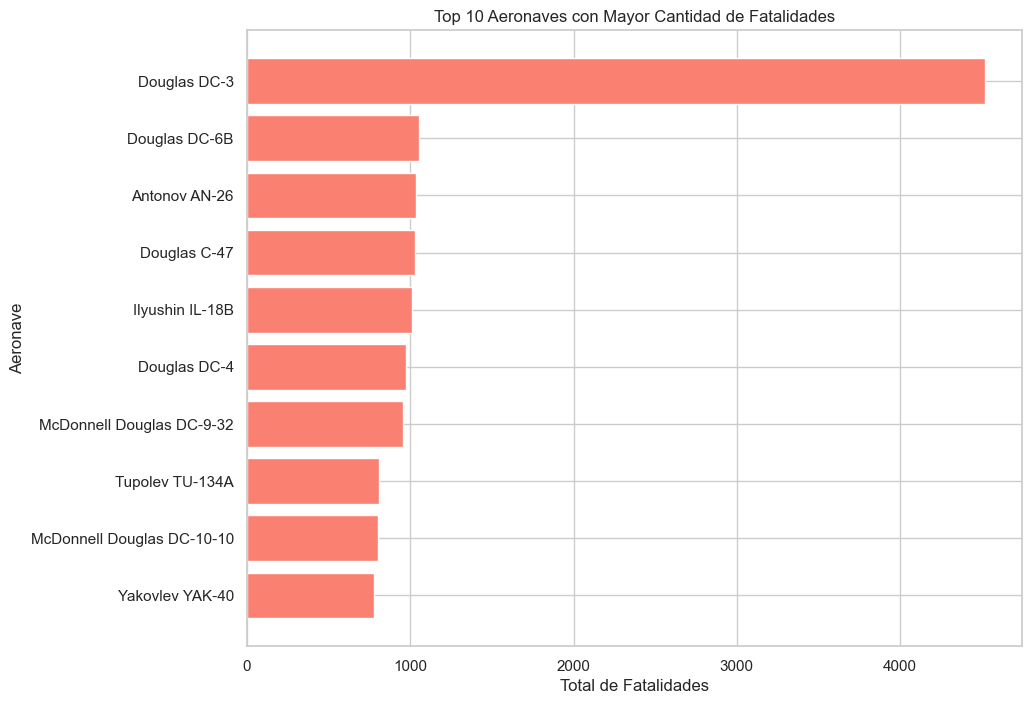

In [609]:
fatalities_by_aircraft = df_accident.groupby('aircraft_type')['total_fatalities'].sum()

top_10_fatalities_by_aircraft = fatalities_by_aircraft.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_10_fatalities_by_aircraft.index, top_10_fatalities_by_aircraft.values, color='salmon')
plt.title('Top 10 Aeronaves con Mayor Cantidad de Fatalidades')
plt.xlabel('Total de Fatalidades')
plt.ylabel('Aeronave')
plt.show()

In [610]:
top_10_fatalities_by_aircraft = pd.DataFrame(top_10_fatalities_by_aircraft)

In [611]:
top_10_fatalities_by_aircraft

,total_fatalities
aircraft_type,
Yakovlev YAK-40,777.0
McDonnell Douglas DC-10-10,804.0
Tupolev TU-134A,807.0
McDonnell Douglas DC-9-32,953.0
Douglas DC-4,972.0
Ilyushin IL-18B,1008.0
Douglas C-47,1032.0
Antonov AN-26,1038.0
Douglas DC-6B,1051.0


## Top 10 marcas con Mayor Cantidad de Fatalidades.

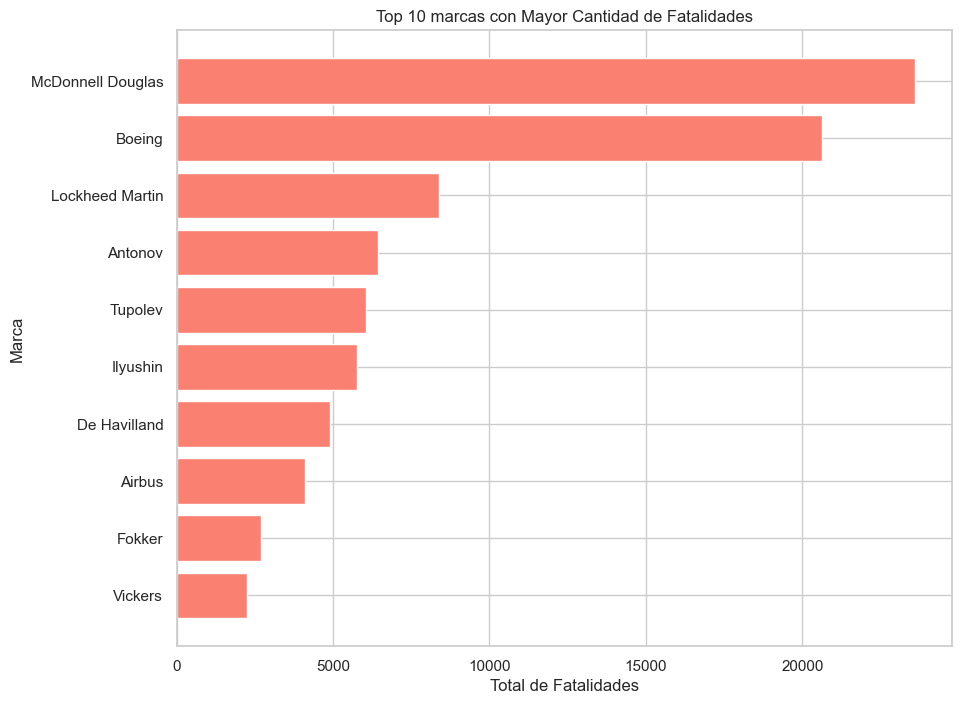

In [616]:
df_fatalities_by_brand = df_accident[df_accident['brand'] != 'other']

fatalities_by_brand = df_fatalities_by_brand.groupby('brand')['total_fatalities'].sum()

top_10_fatalities_by_brand = fatalities_by_brand.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_10_fatalities_by_brand.index, top_10_fatalities_by_brand.values, color='salmon')
plt.title('Top 10 marcas con Mayor Cantidad de Fatalidades')
plt.xlabel('Total de Fatalidades')
plt.ylabel('Marca')
plt.show()

In [619]:
top_10_fatalities_by_brand = pd.DataFrame(top_10_fatalities_by_brand)
top_10_fatalities_by_brand

,total_fatalities
brand,
Vickers,2246.0
Fokker,2701.0
Airbus,4091.0
De Havilland,4908.0
Ilyushin,5783.0
Tupolev,6054.0
Antonov,6450.0
Lockheed Martin,8391.0
Boeing,20625.0


## KPIs.